In [1]:
#import the necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#display the plots inside this environment without having to call show()
#set the dataframe options - should show all columns

%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('max_colwidth', None)

# Exploratory Analysis

> In this section I go through the data with an intention of finding out the structure, distribution and general feel of the data.
>
> The exploration will be guided by both the data, as well as intuition. For example, I simply do not expect an age of over (say) 150 years - this would mean that the data is not very accurate.

## Gather

In [3]:
#load the data onto an on-memory dataframe
df = pd.read_csv('Nutrition__Physical_Activity__and_Obesity_-_Behavioral_Risk_Factor_Surveillance_System.csv')

## Assess

> While assessing the data, I will majorly concentrate on highlighting and correcting data quality issues.
>
> Any characteristic of the data that might help later in in the analysis will also be noted.

In [4]:
#show five random records from the dataset
df.sample(5)

YearStart  YearEnd LocationAbbr LocationDesc  \
8899        2011     2011           IL     Illinois   
11957       2013     2013           KY     Kentucky   
47304       2015     2015           NE     Nebraska   
51121       2016     2016           MT      Montana   
41890       2015     2015           MT      Montana   

                                       Datasource                    Class  \
8899   Behavioral Risk Factor Surveillance System    Fruits and Vegetables   
11957  Behavioral Risk Factor Surveillance System    Fruits and Vegetables   
47304  Behavioral Risk Factor Surveillance System  Obesity / Weight Status   
51121  Behavioral Risk Factor Surveillance System  Obesity / Weight Status   
41890  Behavioral Risk Factor Surveillance System        Physical Activity   

                                  Topic  \
8899   Fruits and Vegetables - Behavior   
11957  Fruits and Vegetables - Behavior   
47304           Obesity / Weight Status   
51121           Obesity / Weight Status   
41890      Physical Activity - Behavior   

                                                                                                                                                                                                                                                    Question  \
8899                                                                                                                                                                                   Percent of adults who report consuming fruit less than one time daily   
11957                                                                                                                                                                             Percent of adults who report consuming vegetables less than one time daily   
47304                                                                                                                                                                        Percent of adults aged 18 years and older who have an overweight classification   
51121                                                                                                                                                                                             Percent of adults aged 18 years and older who have obesity   
41890  Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic physical activity and engage in muscle-strengthening activities on 2 or more days a week   

       Data_Value_Unit Data_Value_Type  Data_Value  Data_Value_Alt  \
8899               NaN           Value        37.9            37.9   
11957              NaN           Value        39.5            39.5   
47304              NaN           Value        31.7            31.7   
51121              NaN           Value        27.8            27.8   
41890              NaN           Value        23.9            23.9   

      Data_Value_Footnote_Symbol Data_Value_Footnote  Low_Confidence_Limit  \
8899                         NaN                 NaN                  31.8   
11957                        NaN                 NaN                  32.3   
47304                        NaN                 NaN                  28.6   
51121                        NaN                 NaN                  18.0   
41890                        NaN                 NaN                  21.0   

       High_Confidence_Limit   Sample_Size Total Age(years)  \
8899                     44.2        539.0   NaN        NaN   
11957                    47.1        862.0   NaN        NaN   
47304                    35.0       2313.0   NaN        NaN   
51121                    40.2        114.0   NaN        NaN   
41890                    27.1       1605.0   NaN        NaN   

                              Education Gender             Income  \
8899                                NaN    NaN  $25,000 - $34,999   
1195

In [5]:
#print the size of the data
df.shape

(53392, 33)

> The dataset has 53392 records and 33 dimensions as represented in the cell above.

In [6]:
#display the columns that the dataset has
df.columns

Index(['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'Datasource',
       'Class', 'Topic', 'Question', 'Data_Value_Unit', 'Data_Value_Type',
       'Data_Value', 'Data_Value_Alt', 'Data_Value_Footnote_Symbol',
       'Data_Value_Footnote', 'Low_Confidence_Limit', 'High_Confidence_Limit ',
       'Sample_Size', 'Total', 'Age(years)', 'Education', 'Gender', 'Income',
       'Race/Ethnicity', 'GeoLocation', 'ClassID', 'TopicID', 'QuestionID',
       'DataValueTypeID', 'LocationID', 'StratificationCategory1',
       'Stratification1', 'StratificationCategoryId1', 'StratificationID1'],
      dtype='object')

In [7]:
#a summary of the numerical columns
df.describe().transpose()

count         mean           std     min     25%  \
YearStart               53392.0  2013.281465      1.693300  2011.0  2012.0   
YearEnd                 53392.0  2013.281465      1.693300  2011.0  2012.0   
Data_Value_Unit             0.0          NaN           NaN     NaN     NaN   
Data_Value              48346.0    31.156681     10.247033     0.9    24.1   
Data_Value_Alt          48346.0    31.156681     10.247033     0.9    24.1   
Low_Confidence_Limit    48346.0    26.892227     10.038584     0.3    20.0   
High_Confidence_Limit   48346.0    35.989997     11.205813     3.0    28.2   
Sample_Size             48346.0  3889.192860  19829.421290    50.0   566.0   
LocationID              53392.0    30.282215     16.821318     1.0    17.0   

                            50%     75%       max  
YearStart               2013.00  2015.0    2016.0  
YearEnd                 2013.00  2015.0    2016.0  
Data_Value_Unit             NaN     NaN       NaN  
Data_Value                30.70    37.0      77.6  
Data_Value_Alt            30.70    37.0      77.6  
Low_Confidence_Limit      26.45    32.9      69.5  
High_Confidence_Limit     35.60    42.2      87.7  
Sample_Size             1209.00  2519.0  476876.0  
LocationID                30.00    44.0      78.0

> From the summary it is evident that the study was carried out between 2011 and 2016, as shown by the rangef of YearStart and YearEnd.

> An important attribute is how much null values there are in the dataset.
>
> In the cell below, I look at how many null values exist in each column

In [8]:
# display the null values in each column
df.isnull().sum().sort_values()

YearStart                         0
Stratification1                   0
StratificationCategory1           0
LocationID                        0
DataValueTypeID                   0
QuestionID                        0
TopicID                           0
ClassID                           0
StratificationCategoryId1         0
StratificationID1                 0
YearEnd                           0
LocationAbbr                      0
LocationDesc                      0
Datasource                        0
Class                             0
Topic                             0
Question                          0
Data_Value_Type                   0
GeoLocation                    1008
Data_Value                     5046
Sample_Size                    5046
High_Confidence_Limit          5046
Low_Confidence_Limit           5046
Data_Value_Alt                 5046
Race/Ethnicity                38136
Income                        40043
Age(years)                    41954
Education                   

> Columns that have only one unique value can as well be excluded since they do not add much information to the data.
>
> In the cell below I probe each column to see the number of unique values it contains

In [9]:
#show the number of unique values each column has
for col in df.columns:
    print(f'{col} has {df[col].nunique()} unique values')

YearStart has 6 unique values
YearEnd has 6 unique values
LocationAbbr has 55 unique values
LocationDesc has 55 unique values
Datasource has 1 unique values
Class has 3 unique values
Topic has 3 unique values
Question has 9 unique values
Data_Value_Unit has 0 unique values
Data_Value_Type has 1 unique values
Data_Value has 669 unique values
Data_Value_Alt has 669 unique values
Data_Value_Footnote_Symbol has 1 unique values
Data_Value_Footnote has 2 unique values
Low_Confidence_Limit has 654 unique values
High_Confidence_Limit  has 723 unique values
Sample_Size has 8123 unique values
Total has 1 unique values
Age(years) has 6 unique values
Education has 4 unique values
Gender has 2 unique values
Income has 7 unique values
Race/Ethnicity has 8 unique values
GeoLocation has 54 unique values
ClassID has 3 unique values
TopicID has 3 unique values
QuestionID has 9 unique values
DataValueTypeID has 1 unique values
LocationID has 55 unique values
StratificationCategory1 has 6 unique values
St

> It is also important to get to know the relationships that exist between the columns early on in the analysis

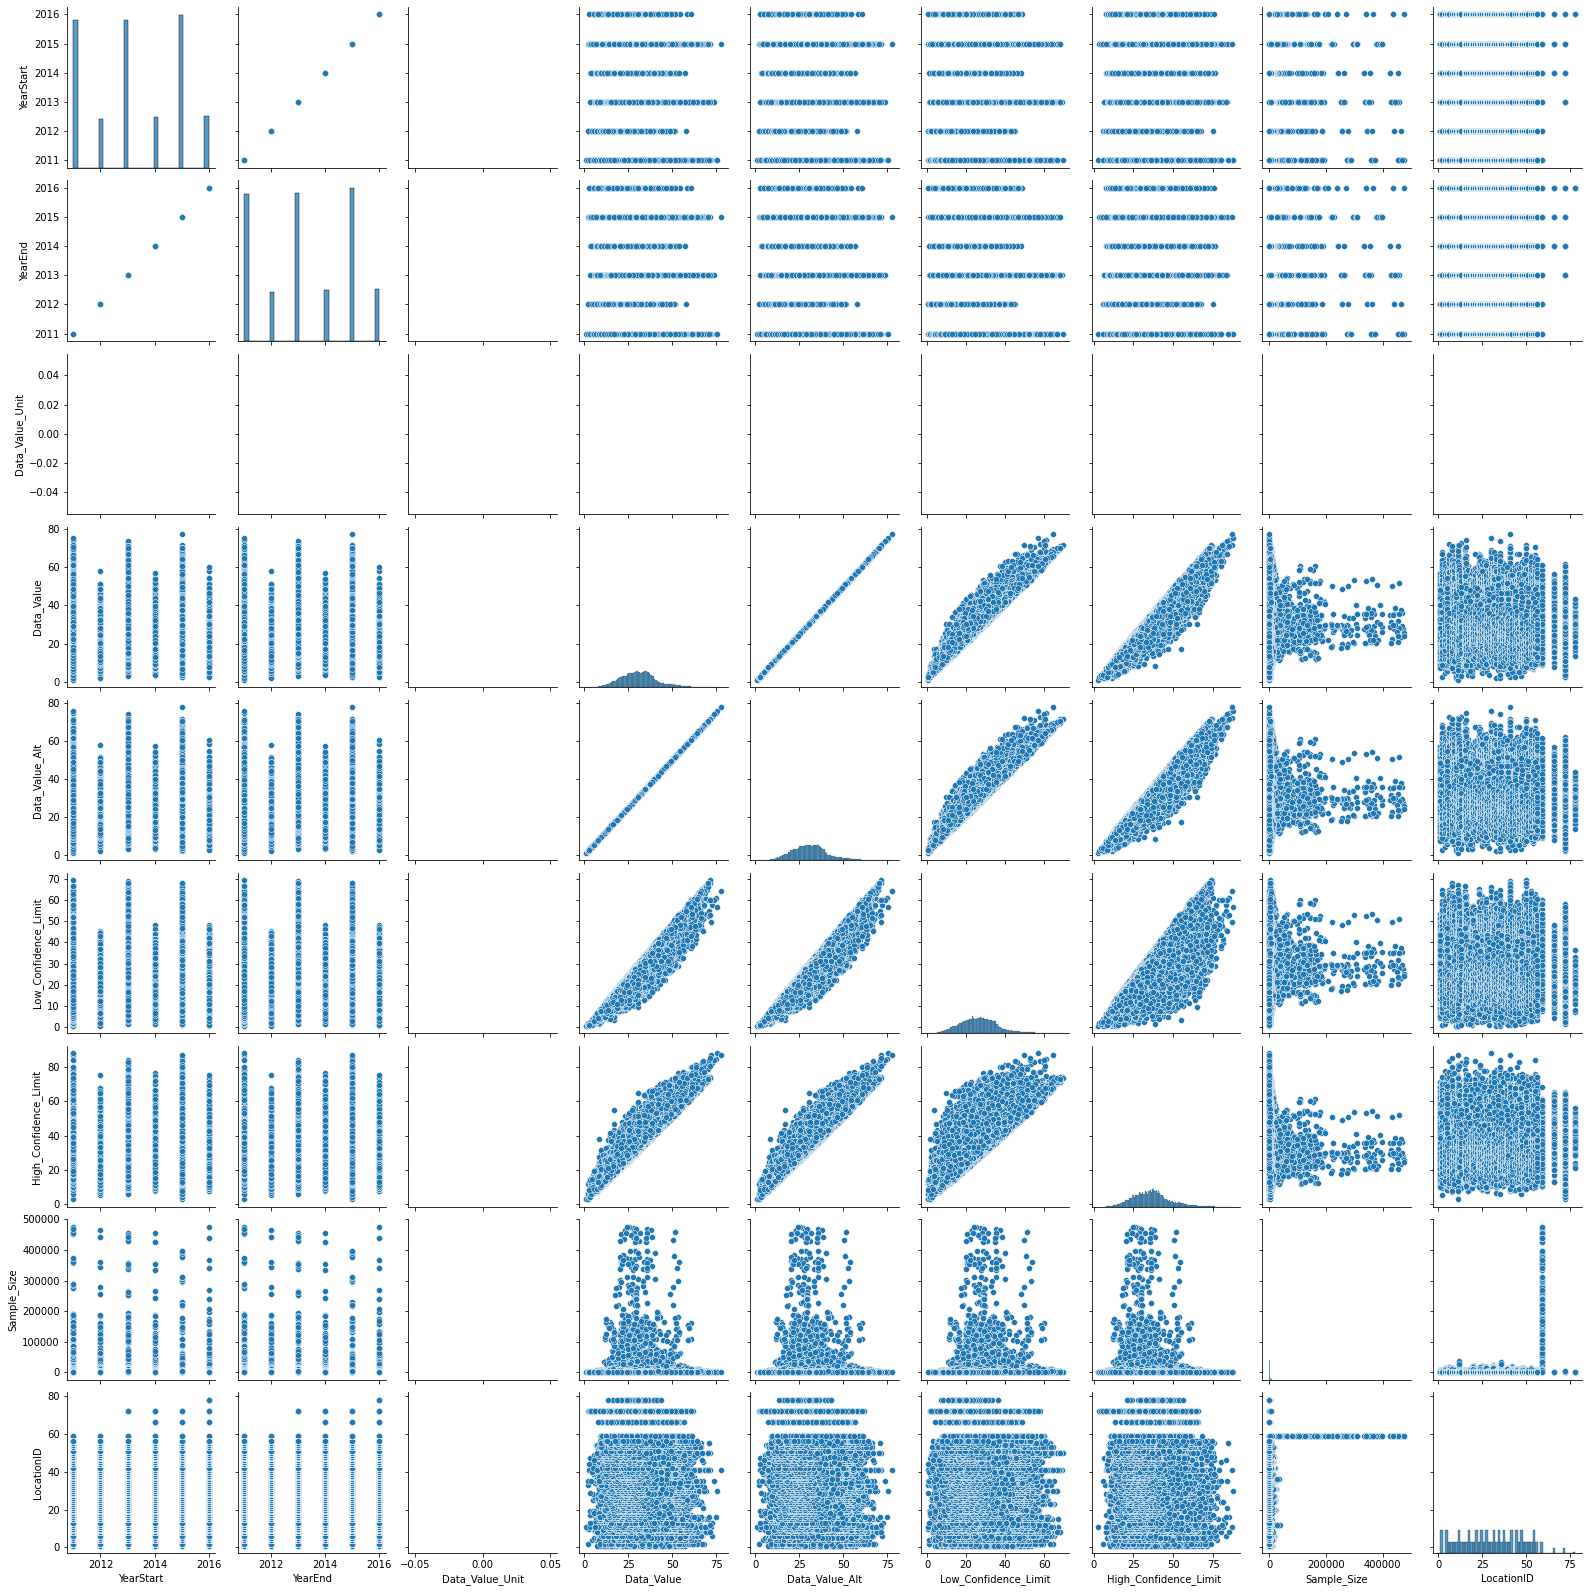

In [10]:
#display the relationship of each column against every other column
sns.pairplot(df);

> (YearStart, YearEnd) and (Data_Value, Data_Value_Alt) have perfect correlation to each other. This means that they are essentially the same data replicated across multiple columns. One of them can be dropped

In [11]:
#find out the number of duplicated records
df.duplicated().sum()

0

> All records in the dataset are unique as shown in the cell above

> It is also necessary to understand the data types of the values for each column.
>
> This is important to know since not all operations can be performed on all data types

In [12]:
df.dtypes

YearStart                       int64
YearEnd                         int64
LocationAbbr                   object
LocationDesc                   object
Datasource                     object
Class                          object
Topic                          object
Question                       object
Data_Value_Unit               float64
Data_Value_Type                object
Data_Value                    float64
Data_Value_Alt                float64
Data_Value_Footnote_Symbol     object
Data_Value_Footnote            object
Low_Confidence_Limit          float64
High_Confidence_Limit         float64
Sample_Size                   float64
Total                          object
Age(years)                     object
Education                      object
Gender                         object
Income                         object
Race/Ethnicity                 object
GeoLocation                    object
ClassID                        object
TopicID                        object
QuestionID  

### Issues with data

> After some exploration I realized the data has some quality issues, which I will focus on in this section
>
> By the end of this section I hope that I will have clean and structured data

#### Data tidiness

> In this subsection, issues of atomicity of data will be higlighted.
>
> To make for easy analysis, the following guidelines should be adhered to;
>
>1. Each variable should have its own column
>2. Each observation should be a row (no duplicates should exist)
>3. Each organizational unit should be a table/dataset

> The intention is to separate each dataset on its own, then later bring it together in an organized manner. For example, it does not make for good viewing that location alone is represented with 4 different columns in the same dataset.

1. The dataset has a semi-dataset that represents questions
2. The dataset has a semi-dataset that represents topics
3. The dataset has a semi-dataset that represents classes
4. The dataset has a semi-dataset that represents locations
5. The dataset has a semi-dataset that represents stratifications
6. YearStart has a perfect correlation to YearEnd - this could mean that they contain the same values, which then makes one of the columns redundant
7. Data_Value has a perfect correlation to Data_Value_Alt

#### Data Cleanliness

> Columns which have less than 2 unique values really do not add much to our analysis
>
> All records will most likely have the same value, and so the column can be ignored

1. Datasource has 1 unique value
2. Data_Value_Unit has 0 unique values - this is due to the fact that the column does not have a single non-null value. It shall be handled as a missing data issue.
3. Data_Value_Type has 1 unique value
4. Data_Value_Footnote_Symbol has 1 unique value
5. Total has 1 unique values

#### Missing Data

> Missing values could mean that the data is improperly stored, or simply that such data was not captured.
>
> In this section I highlight issues with missing data.

1. GeoLocation has 1008 missing values
2. Data_Value has 5046 missing values
3. Sample_Size has 5046 missing values
4. High_Confidence_Limit has 5046 missing values
5. Low_Confidence_Limit has 5046 missing values
6. Data_Value_Alt has 5046 missing values
7. Race/Ethnicity has 38136 missing values
8. Income has 40043 missing values
9. Age(years) has 41954 missing values
10. Education has 45764 missing values
11. Data_Value_Footnote has 48346 missing values
12. Data_Value_Footnote_Symbol has 48346 missing values
13. Gender has 49578 missing values
14. Total has 51485 missing values
15. Data_Value_Unit has 53392 missing values

### Cleaning data

> In this section I address the issues outlined above.
>
> This step will be repetitive, to try and obtain clean and tidy data
>
> I will detail the problem that I want solved, propose a resolution plan and then implement the plan. As a final step I will test to see that my expectations have been achieved.

##### Problem Definition

The dataset has a semi-dataset that represents questions

##### Resolution Plan

Create a dataset that contains only information about questions

##### Implementation and Testing

In [13]:
questions_df = df[['QuestionID', 'Question']].drop_duplicates()
questions_df.reset_index(drop=True, inplace=True)
questions_df.head()

QuestionID  \
0       Q036   
1       Q037   
2       Q018   
3       Q019   
4       Q046   

                                                                                   Question  
0                                Percent of adults aged 18 years and older who have obesity  
1           Percent of adults aged 18 years and older who have an overweight classification  
2                     Percent of adults who report consuming fruit less than one time daily  
3                Percent of adults who report consuming vegetables less than one time daily  
4  Percent of adults who engage in muscle-strengthening activities on 2 or more days a week

> We now have an atomic dataset representing questions alone
>
>We can use the QuestionID to reference a question in a different table if need be

In [14]:
questions_df.shape

(9, 2)

> In total, the the data contains answers to 9 questions, which are listed below
>
> When cleaning the main table, I will drop the Question description since it is long. However, it a question can still be referenced using the ID

In [15]:
questions_df

QuestionID  \
0       Q036   
1       Q037   
2       Q018   
3       Q019   
4       Q046   
5       Q043   
6       Q044   
7       Q045   
8       Q047   

                                                                                                                                                                                                                                                Question  
0                                                                                                                                                                                             Percent of adults aged 18 years and older who have obesity  
1                                                                                                                                                                        Percent of adults aged 18 years and older who have an overweight classification  
2                                                                                                                                                                                  Percent of adults who report consuming fruit less than one time daily  
3                                                                                                                                                                             Percent of adults who report consuming vegetables less than one time daily  
4                                                                                                                                                               Percent of adults who engage in muscle-strengthening activities on 2 or more days a week  
5                                                   Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)  
6  Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic physical activity and engage in muscle-strengthening activities on 2 or more days a week  
7                                                  Percent of adults who achieve at least 300 minutes a week of moderate-intensity aerobic physical activity or 150 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)  
8                                                                                                                                                                                      Percent of adults who engage in no leisure-time physical activity

##### Problem Definition

The dataset has a semi-dataset that represents topics

##### Resolution plan

Create a dataset that contains only information about topics

##### Implementation and Testing

In [16]:
topics_df = df[['TopicID', 'Topic']].drop_duplicates()
topics_df.reset_index(drop=True, inplace=True)
topics_df.head()

TopicID                             Topic
0    OWS1           Obesity / Weight Status
1     FV1  Fruits and Vegetables - Behavior
2     PA1      Physical Activity - Behavior

In [17]:
topics_df.shape

(3, 2)

> Now topics have their own table, and can be referenced using the ID - which can remain in the main table as a foreign key

##### Problem Definition

The dataset has a semi-dataset that represents classes

##### Resolution Plan

Create a dataset that contains only information about classes

##### Implementation and Testing

In [18]:
classes_df = df[['ClassID', 'Class']].drop_duplicates()
classes_df.reset_index(drop=True, inplace=True)
classes_df.head()

ClassID                    Class
0     OWS  Obesity / Weight Status
1      FV    Fruits and Vegetables
2      PA        Physical Activity

In [19]:
classes_df.shape

(3, 2)

> It is becoming clear that classes and topics could be very related.
>
> This means that our initial dataset had 4 columns(Class, ClassID, Topic and TopicID) representing the same dimension.

In [20]:
# df[((df['Class'] == 'Obesity/Weight Status') and (df['Topic'] == 'Obesity/Weight Status'))
#    or ((df['Class'] == 'Fruits and Vegetables - Behavior') and (df['Topic'] == 'Fruits and Vegentables'))
#   or ((df['Class'] == 'Physical Activity - Behavior') and (df['Topic'] == 'Physical Activity'))].sum()

##### Problem Definition

The dataset has a semi-dataset that represents locations

##### Resolution Plan

Create a dataset that contains only information about location

##### Implementation and Testing

In [21]:
location_df = df[['LocationID', 'LocationAbbr', 'GeoLocation', 'LocationDesc']].drop_duplicates()
location_df.reset_index(drop=True, inplace=True)
location_df.head()

LocationID LocationAbbr                                GeoLocation  \
0           1           AL    (32.84057112200048, -86.63186076199969)   
1          59           US                                        NaN   
2           2           AK   (64.84507995700051, -147.72205903599973)   
3           4           AZ  (34.865970280000454, -111.76381127699972)   
4           5           AR    (34.74865012400045, -92.27449074299966)   

  LocationDesc  
0      Alabama  
1     National  
2       Alaska  
3      Arizona  
4     Arkansas

In [22]:
location_df.shape

(55, 4)

> The data containing information about different locations is now in its own dataframe. Redundant columns can now be dropped from the main dataframe

##### Problem Definition

The dataset contains a semi-dataset the represents information on how stratification was done

##### Resolution Plan

Create a dataset that contains only information about stratification

##### Implementation and Testing

In [23]:
stratification_df = df[['Stratification1', 'StratificationID1']].drop_duplicates()
stratification_df.reset_index(drop=True, inplace=True)

categories_df = df[['StratificationCategory1', 'StratificationCategoryId1']].drop_duplicates()
categories_df.reset_index(drop=True, inplace=True)

In [24]:
stratification_df.head()

Stratification1 StratificationID1
0                  Total           OVERALL
1                   Male              MALE
2                 Female            FEMALE
3  Less than high school             EDUHS
4   High school graduate         EDUHSGRAD

In [25]:
categories_df.head()

StratificationCategory1 StratificationCategoryId1
0                   Total                       OVR
1                  Gender                       GEN
2               Education                       EDU
3             Age (years)                     AGEYR
4                  Income                       INC

In [26]:
stratification_df.shape

(28, 2)

In [27]:
categories_df.shape

(6, 2)

In [28]:
categories_df

StratificationCategory1 StratificationCategoryId1
0                   Total                       OVR
1                  Gender                       GEN
2               Education                       EDU
3             Age (years)                     AGEYR
4                  Income                       INC
5          Race/Ethnicity                      RACE

> The data containing information about categories is now in their own dataframes. Redundant columns can now be dropped from the main dataframe

##### Problem Definition

Some columns in the dataset have less than 2 unique values

##### Resolution Plan

Exclude from the dataset columns which have at most 1 unique value

##### Implementation and Testing

In [29]:
df_clean = df.drop(['Datasource', 'Data_Value_Unit', 'Data_Value_Type', 'Data_Value_Footnote_Symbol', 'Total', 'DataValueTypeID'], axis=1)
df_clean.sample(4)

YearStart  YearEnd LocationAbbr LocationDesc                    Class  \
29724       2014     2014           TN    Tennessee  Obesity / Weight Status   
34368       2013     2013           WI    Wisconsin        Physical Activity   
4171        2011     2011           CT  Connecticut        Physical Activity   
49842       2016     2016           OK     Oklahoma  Obesity / Weight Status   

                              Topic  \
29724       Obesity / Weight Status   
34368  Physical Activity - Behavior   
4171   Physical Activity - Behavior   
49842       Obesity / Weight Status   

                                                                                       Question  \
29724                                Percent of adults aged 18 years and older who have obesity   
34368  Percent of adults who engage in muscle-strengthening activities on 2 or more days a week   
4171   Percent of adults who engage in muscle-strengthening activities on 2 or more days a week   
49842           Percent of adults aged 18 years and older who have an overweight classification   

       Data_Value  Data_Value_Alt  \
29724        23.9            23.9   
34368         NaN             NaN   
4171         33.2            33.2   
49842        35.5            35.5   

                                           Data_Value_Footnote  \
29724                                                      NaN   
34368  Data not available because sample size is insufficient.   
4171                                                       NaN   
49842                                                      NaN   

       Low_Confidence_Limit  High_Confidence_Limit   Sample_Size   Age(years)  \
29724                  21.5                    26.5       1908.0  65 or older   
34368                   NaN                     NaN          NaN          NaN   
4171                   28.7                    37.9        638.0      25 - 34   
49842                  31.2                    40.1        672.0      35 - 44   

      Education Gender Income Race/Ethnicity  \
29724       NaN    NaN    NaN            NaN   
34368       NaN    NaN    NaN          Other   
4171        NaN    NaN    NaN            NaN   
49842       NaN    NaN    NaN            NaN   

                                   GeoLocation ClassID TopicID QuestionID  \
29724  (35.68094058000048, -85.77449091399967)     OWS    OWS1       Q036   
34368  (44.39319117400049, -89.81637074199966)      PA     PA1       Q046   
4171   (41.56266102000046, -72.64984095199964)      PA     PA1       Q046   
49842  (35.47203135600046, -97.52107021399968)     OWS    OWS1       Q037   

       LocationID StratificationCategory1 Stratification1  \
29724          47             Age (years)     65 or older   
34368          55          Race/Ethnicity           Other   
4171            9             Age (years)         25 - 34   
49842          40             Age (years)         35 - 44   

      StratificationCategoryId1 StratificationID1  
29724                     AGEYR       AGEYR65PLUS  
34368                      RACE           RACEOTH  
4171                      AGEYR         AGEYR2534  
49842                     AGEYR         AGEYR3544

In [30]:
df_clean.shape

(53392, 27)

In [31]:
for col in df_clean.columns:
    print(f'{col} has {df_clean[col].nunique()} unique values')

YearStart has 6 unique values
YearEnd has 6 unique values
LocationAbbr has 55 unique values
LocationDesc has 55 unique values
Class has 3 unique values
Topic has 3 unique values
Question has 9 unique values
Data_Value has 669 unique values
Data_Value_Alt has 669 unique values
Data_Value_Footnote has 2 unique values
Low_Confidence_Limit has 654 unique values
High_Confidence_Limit  has 723 unique values
Sample_Size has 8123 unique values
Age(years) has 6 unique values
Education has 4 unique values
Gender has 2 unique values
Income has 7 unique values
Race/Ethnicity has 8 unique values
GeoLocation has 54 unique values
ClassID has 3 unique values
TopicID has 3 unique values
QuestionID has 9 unique values
LocationID has 55 unique values
StratificationCategory1 has 6 unique values
Stratification1 has 28 unique values
StratificationCategoryId1 has 6 unique values
StratificationID1 has 28 unique values


> The main dataframe now only contains columns which can be used for some type of grouping, and this can improve the analysis

##### Problem Definition

The dataset contains information that describes different observations

##### Resolution Plan

Exclude information that describe location, categories, classes, topics and questions - only leave IDs which can be used for referencing if there is need

##### Implementation and Testing

In [32]:
atomic_df = df_clean.drop(['LocationID', 'LocationDesc', 'GeoLocation', 'StratificationID1', 'StratificationCategoryId1', 'Class', 'Topic', 'Question', 'TopicID'], axis=1)
atomic_df.sample(4)

YearStart  YearEnd LocationAbbr  Data_Value  Data_Value_Alt  \
5559        2011     2011           DC         NaN             NaN   
15472       2014     2014           MI        11.6            11.6   
39765       2015     2015           HI        60.7            60.7   
33201       2011     2011           WV        29.3            29.3   

                                           Data_Value_Footnote  \
5559   Data not available because sample size is insufficient.   
15472                                                      NaN   
39765                                                      NaN   
33201                                                      NaN   

       Low_Confidence_Limit  High_Confidence_Limit   Sample_Size Age(years)  \
5559                    NaN                     NaN          NaN        NaN   
15472                   8.9                    14.9        531.0    18 - 24   
39765                  57.8                    63.6       2042.0        NaN   
33201                  25.1                    33.7        652.0        NaN   

      Education Gender              Income                 Race/Ethnicity  \
5559        NaN    NaN                 NaN  American Indian/Alaska Native   
15472       NaN    NaN                 NaN                            NaN   
39765       NaN    NaN  $75,000 or greater                            NaN   
33201       NaN    NaN   Less than $15,000                            NaN   

      ClassID QuestionID StratificationCategory1  \
5559       PA       Q044          Race/Ethnicity   
15472     OWS       Q036             Age (years)   
39765      PA       Q043                  Income   
33201     OWS       Q037                  Income   

                     Stratification1  
5559   American Indian/Alaska Native  
15472                        18 - 24  
39765             $75,000 or greater  
33201              Less than $15,000

In [33]:
atomic_df.shape

(53392, 18)

> The atomic dataframe now obeys one of the laws of atomicity - each variable is represented by one column. A direct result of this is the sharp reduction in the dimensions of the dataset

##### Problem Definition

YearStart has a perfect correlation to YearEnd

##### Resolution Plan

Drop one of YearStart and YearEnd, then rename the remaining column as simply Year

##### Implementation and Testing

In [34]:
atomic_df = atomic_df.drop(['YearEnd'], axis=1)
atomic_df.rename(columns={'YearStart': 'Year'}, inplace=True)
atomic_df.head()

Year LocationAbbr  Data_Value  Data_Value_Alt Data_Value_Footnote  \
0  2011           AL        32.0            32.0                 NaN   
1  2011           AL        32.3            32.3                 NaN   
2  2011           AL        31.8            31.8                 NaN   
3  2011           AL        33.6            33.6                 NaN   
4  2011           AL        32.8            32.8                 NaN   

   Low_Confidence_Limit  High_Confidence_Limit   Sample_Size Age(years)  \
0                  30.5                    33.5       7304.0        NaN   
1                  29.9                    34.7       2581.0        NaN   
2                  30.0                    33.6       4723.0        NaN   
3                  29.9                    37.6       1153.0        NaN   
4                  30.2                    35.6       2402.0        NaN   

               Education  Gender Income Race/Ethnicity ClassID QuestionID  \
0                    NaN     NaN    NaN            NaN     OWS       Q036   
1                    NaN    Male    NaN            NaN     OWS       Q036   
2                    NaN  Female    NaN            NaN     OWS       Q036   
3  Less than high school     NaN    NaN            NaN     OWS       Q036   
4   High school graduate     NaN    NaN            NaN     OWS       Q036   

  StratificationCategory1        Stratification1  
0                   Total                  Total  
1                  Gender                   Male  
2                  Gender                 Female  
3               Education  Less than high school  
4               Education   High school graduate

> This result has also resulted in the reduction of 1 dimension

##### Problem Definition

Data_Value has a perfect correlation to Data_Value_Alt

##### Resolution Plan

Drop one of Data_Value and Data_Value_Alt

##### Implementation and Testing

In [35]:
atomic_df = atomic_df.drop(['Data_Value_Alt'], axis=1)
atomic_df.head()

Year LocationAbbr  Data_Value Data_Value_Footnote  Low_Confidence_Limit  \
0  2011           AL        32.0                 NaN                  30.5   
1  2011           AL        32.3                 NaN                  29.9   
2  2011           AL        31.8                 NaN                  30.0   
3  2011           AL        33.6                 NaN                  29.9   
4  2011           AL        32.8                 NaN                  30.2   

   High_Confidence_Limit   Sample_Size Age(years)              Education  \
0                    33.5       7304.0        NaN                    NaN   
1                    34.7       2581.0        NaN                    NaN   
2                    33.6       4723.0        NaN                    NaN   
3                    37.6       1153.0        NaN  Less than high school   
4                    35.6       2402.0        NaN   High school graduate   

   Gender Income Race/Ethnicity ClassID QuestionID StratificationCategory1  \
0     NaN    NaN            NaN     OWS       Q036                   Total   
1    Male    NaN            NaN     OWS       Q036                  Gender   
2  Female    NaN            NaN     OWS       Q036                  Gender   
3     NaN    NaN            NaN     OWS       Q036               Education   
4     NaN    NaN            NaN     OWS       Q036               Education   

         Stratification1  
0                  Total  
1                   Male  
2                 Female  
3  Less than high school  
4   High school graduate

In [36]:
atomic_df.shape

(53392, 16)

> 1 unnecessary dimension has also been removed from the data

In [37]:
atomic_df.isnull().sum().sort_values()

Year                           0
LocationAbbr                   0
ClassID                        0
QuestionID                     0
StratificationCategory1        0
Stratification1                0
Data_Value                  5046
Low_Confidence_Limit        5046
High_Confidence_Limit       5046
Sample_Size                 5046
Race/Ethnicity             38136
Income                     40043
Age(years)                 41954
Education                  45764
Data_Value_Footnote        48346
Gender                     49578
dtype: int64

In [38]:
atomic_df.dtypes

Year                         int64
LocationAbbr                object
Data_Value                 float64
Data_Value_Footnote         object
Low_Confidence_Limit       float64
High_Confidence_Limit      float64
Sample_Size                float64
Age(years)                  object
Education                   object
Gender                      object
Income                      object
Race/Ethnicity              object
ClassID                     object
QuestionID                  object
StratificationCategory1     object
Stratification1             object
dtype: object

In [39]:
atomic_df['Data_Value_Footnote'].unique()

array([nan, 'Data not available because sample size is insufficient.',
       'Data not available because sample size is insufficient.  If data only missing for the confidence interval, the confidence interval was not calculated.'],
      dtype=object)

In [40]:
atomic_df['Data_Value_Footnote'].value_counts()

Data not available because sample size is insufficient.                                                                                                   4624
Data not available because sample size is insufficient.  If data only missing for the confidence interval, the confidence interval was not calculated.     422
Name: Data_Value_Footnote, dtype: int64

> Looking at the stratification column, it seems as though information about Age, Income, Race and Gender are encoded in long form.
>
> It now begins to make sense why such important indicates have numerous null values

In [41]:
education_df = atomic_df[atomic_df['StratificationCategory1'] == 'Education']
education_df.reset_index(drop=True, inplace=True)
education_df.head()

Year LocationAbbr  Data_Value Data_Value_Footnote  Low_Confidence_Limit  \
0  2011           AL        33.6                 NaN                  29.9   
1  2011           AL        32.8                 NaN                  30.2   
2  2011           AL        33.8                 NaN                  31.0   
3  2011           AL        26.4                 NaN                  23.7   
4  2011           AL        33.2                 NaN                  29.2   

   High_Confidence_Limit   Sample_Size Age(years)  \
0                    37.6       1153.0        NaN   
1                    35.6       2402.0        NaN   
2                    36.8       1925.0        NaN   
3                    29.3       1812.0        NaN   
4                    37.5       1153.0        NaN   

                          Education Gender Income Race/Ethnicity ClassID  \
0             Less than high school    NaN    NaN            NaN     OWS   
1              High school graduate    NaN    NaN            NaN     OWS   
2  Some college or technical school    NaN    NaN            NaN     OWS   
3                  College graduate    NaN    NaN            NaN     OWS   
4             Less than high school    NaN    NaN            NaN     OWS   

  QuestionID StratificationCategory1                   Stratification1  
0       Q036               Education             Less than high school  
1       Q036               Education              High school graduate  
2       Q036               Education  Some college or technical school  
3       Q036               Education                  College graduate  
4       Q037               Education             Less than high school

In [42]:
education_df = education_df.drop(['Age(years)', 'Income', 'Race/Ethnicity', 'Data_Value_Footnote', 'Gender', 'StratificationCategory1', 'Stratification1'], axis=1)
education_df.head()

Year LocationAbbr  Data_Value  Low_Confidence_Limit  \
0  2011           AL        33.6                  29.9   
1  2011           AL        32.8                  30.2   
2  2011           AL        33.8                  31.0   
3  2011           AL        26.4                  23.7   
4  2011           AL        33.2                  29.2   

   High_Confidence_Limit   Sample_Size                         Education  \
0                    37.6       1153.0             Less than high school   
1                    35.6       2402.0              High school graduate   
2                    36.8       1925.0  Some college or technical school   
3                    29.3       1812.0                  College graduate   
4                    37.5       1153.0             Less than high school   

  ClassID QuestionID  
0     OWS       Q036  
1     OWS       Q036  
2     OWS       Q036  
3     OWS       Q036  
4     OWS       Q037

In [43]:
education_df.groupby(['QuestionID', 'Education'])['Data_Value'].describe().transpose()

QuestionID             Q018                                             \
Education  College graduate High school graduate Less than high school   
count            158.000000           158.000000            158.000000   
mean              31.493671            44.288608             46.772152   
std                4.989335             4.795486              6.050161   
min               19.400000            33.900000             29.200000   
25%               28.500000            41.000000             42.900000   
50%               30.850000            44.200000             46.100000   
75%               34.375000            47.250000             50.200000   
max               47.000000            58.300000             63.000000   

QuestionID                                              Q019  \
Education  Some college or technical school College graduate   
count                            158.000000       158.000000   
mean                              39.600633        14.291139   
std                                4.826592         2.903136   
min                               29.500000         7.500000   
25%                               36.200000        12.200000   
50%                               39.250000        14.550000   
75%                               42.400000        15.900000   
max                               53.700000        23.100000   

QuestionID                                             \
Education  High school graduate Less than high school   
count                158.000000            158.000000   
mean                  27.952532             33.270253   
std                    3.325748              5.589999   
min                   20.200000             19.200000   
25%                   25.775000             29.800000   
50%                   28.050000             32.900000   
75%                   30.000000             37.275000   
max                   39.300000             49.300000   

QuestionID                                              Q036  \
Education  Some college or technical school College graduate   
count                            158.000000       320.000000   
mean                              21.242405        22.791250   
std                                3.221115         4.166238   
min                               13.500000        11.900000   
25%                               19.000000        20.200000   
50%                               21.250000        22.500000   
75%                               23.100000        25.625000   
max                               32.200000        32.500000   

QuestionID                                             \
Education  High school graduate Less than high school   
count                320.000000            320.000000   
mean                  30.939688             33.026250   
std                    3.388532              3.907945   
min                   21.700000             21.300000   
25%                   28.700000             30.575000   
50%                   31.100000             33.150000   
75%                   33.125000             35.500000   
max                   40.700000             43.300000   

QuestionID                                              Q037  \
Education  Some college or technical school College graduate   
count                            320.000000       320.000000   
mean                              30.110313        37.069688   
std                                3.632661         1.745515   
min                               21.800000        29.100000   
25%                               27.375000        36.100000   
50%                               30.200000        37.200000   
75%                               32.625000        38.200000   
max                               40.800000        43.200000   

QuestionID                                             \
Education  High school graduate Less than high school   
count                320.000000            320.000000   
mean                  3

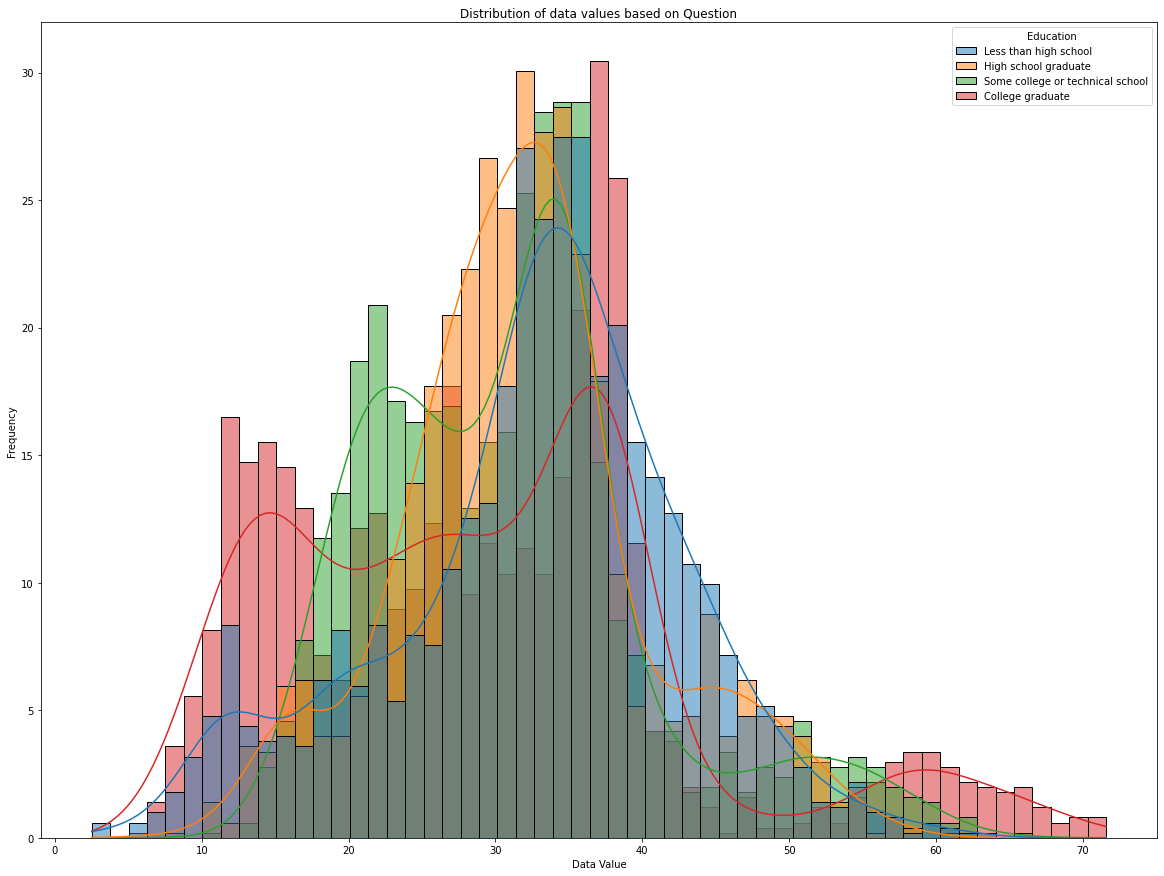

In [44]:
plt.figure(figsize=(20, 15));
sns.histplot(data=education_df, x='Data_Value', hue='Education', stat='frequency', kde=True);
plt.title('Distribution of data values based on Question');
plt.xlabel('Data Value');
plt.ylabel('Frequency');

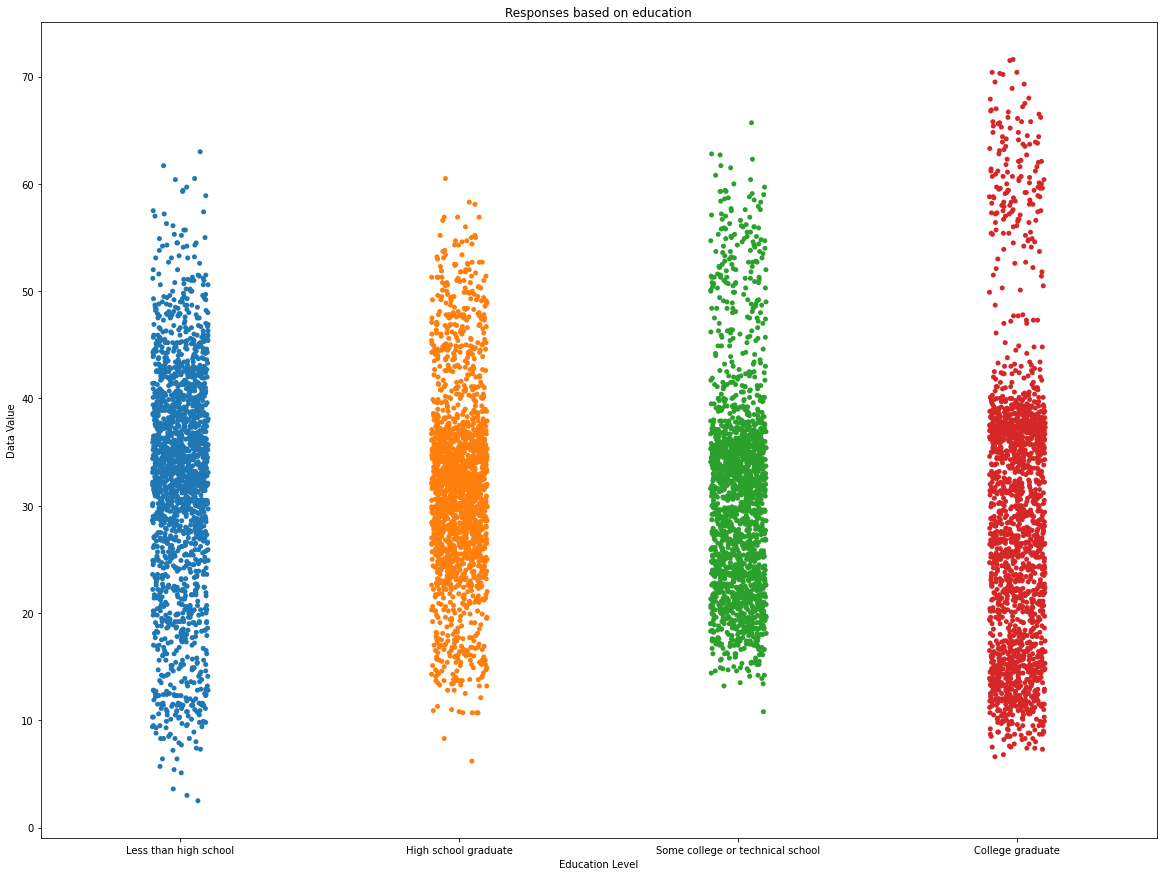

In [45]:
plt.figure(figsize=(20, 15));
sns.stripplot(x = education_df['Education'], y=education_df['Data_Value']);
plt.title('Responses based on education');
plt.xlabel('Education Level');
plt.ylabel('Data Value');

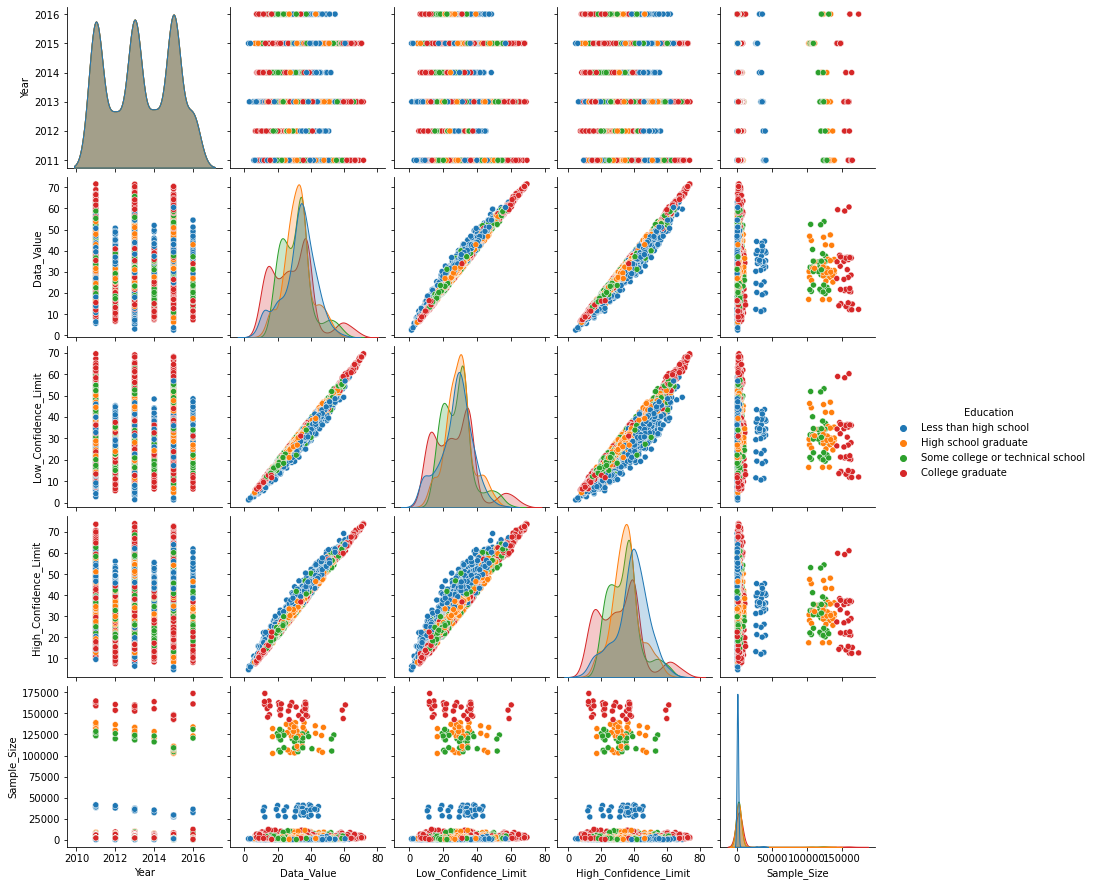

In [46]:
sns.pairplot(education_df, hue='Education');

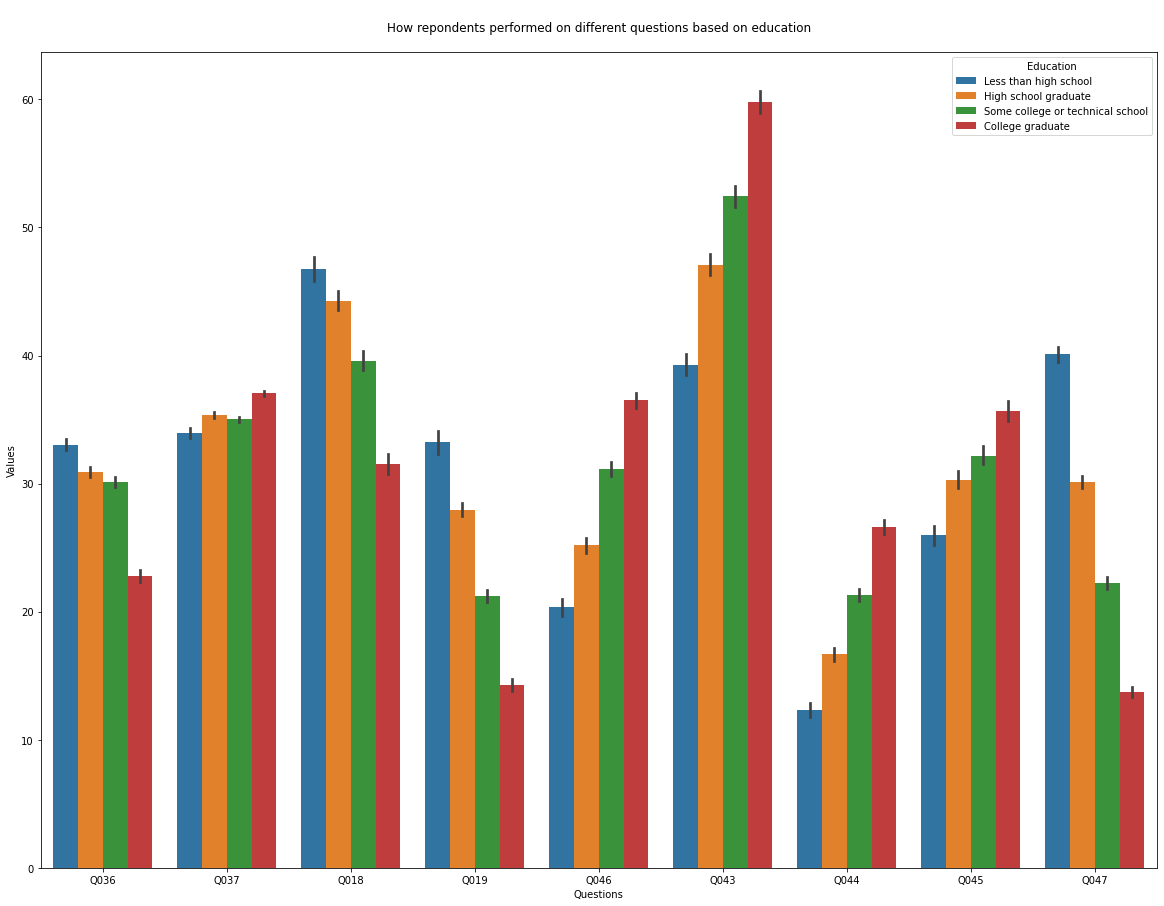

In [47]:
plt.figure(figsize=(20, 15));
sns.barplot(data=education_df, x='QuestionID', y='Data_Value', hue='Education');
plt.title('\nHow repondents performed on different questions based on education\n');
plt.xlabel('Questions');
plt.ylabel('Values');

In [48]:
questions_df

QuestionID  \
0       Q036   
1       Q037   
2       Q018   
3       Q019   
4       Q046   
5       Q043   
6       Q044   
7       Q045   
8       Q047   

                                                                                                                                                                                                                                                Question  
0                                                                                                                                                                                             Percent of adults aged 18 years and older who have obesity  
1                                                                                                                                                                        Percent of adults aged 18 years and older who have an overweight classification  
2                                                                                                                                                                                  Percent of adults who report consuming fruit less than one time daily  
3                                                                                                                                                                             Percent of adults who report consuming vegetables less than one time daily  
4                                                                                                                                                               Percent of adults who engage in muscle-strengthening activities on 2 or more days a week  
5                                                   Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)  
6  Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic physical activity and engage in muscle-strengthening activities on 2 or more days a week  
7                                                  Percent of adults who achieve at least 300 minutes a week of moderate-intensity aerobic physical activity or 150 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)  
8                                                                                                                                                                                      Percent of adults who engage in no leisure-time physical activity

> The data suggests that as someone climbs higher up the education ladder, they are less likely to be obese. In fact, there is a 10% difference between people with less than high school education and those that have ontained college education. However, the data does not show any correlation between being overweight and education status.
>
>

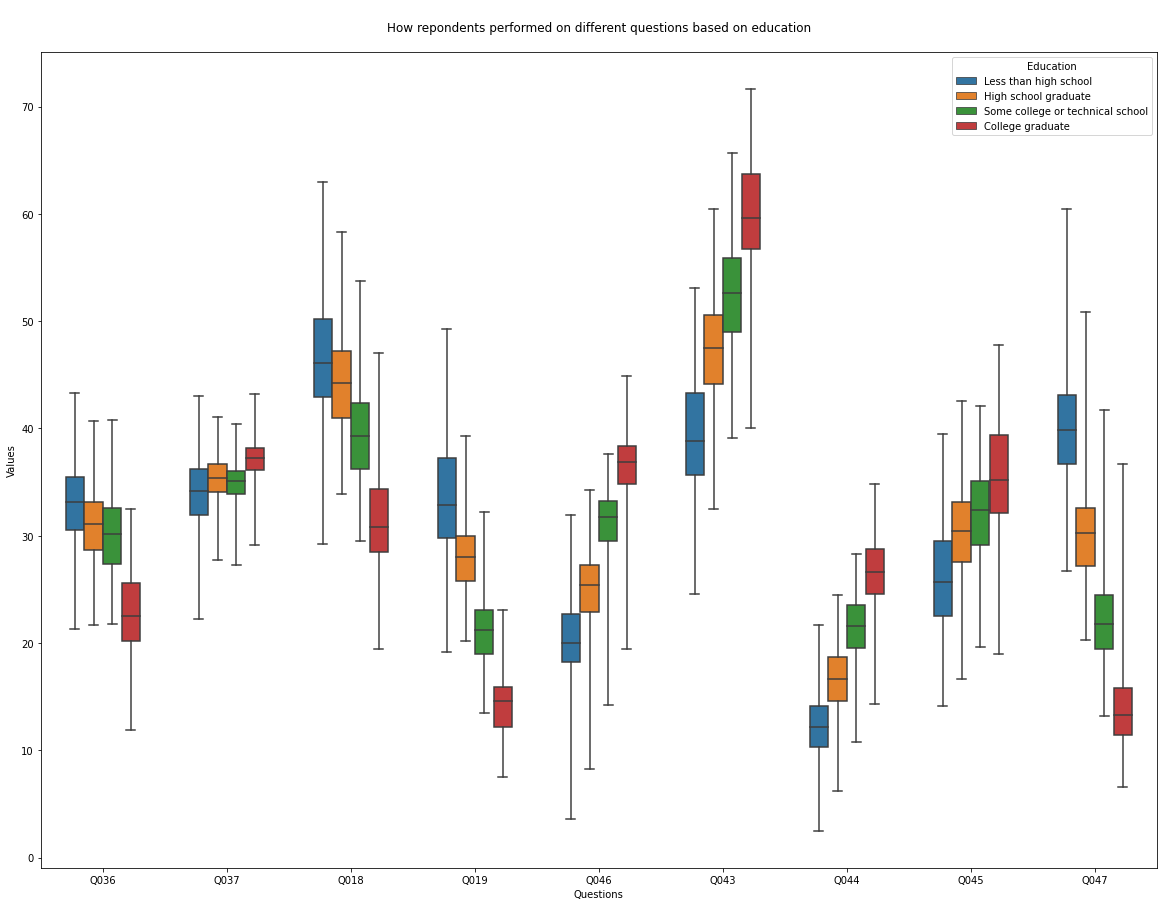

In [49]:
plt.figure(figsize=(20, 15));
sns.boxplot(x="QuestionID", y="Data_Value", data=education_df, hue='Education', whis=[0, 100], width=.6)
plt.title('\nHow repondents performed on different questions based on education\n');
plt.xlabel('Questions');
plt.ylabel('Values');

In [50]:
age_df = atomic_df[atomic_df['StratificationCategory1'] == 'Age (years)']
age_df.reset_index(drop=True, inplace=True)
age_df.head()

Year LocationAbbr  Data_Value Data_Value_Footnote  Low_Confidence_Limit  \
0  2011           AL        16.3                 NaN                  12.6   
1  2011           AL        35.2                 NaN                  30.7   
2  2011           AL        35.5                 NaN                  31.6   
3  2011           AL        38.0                 NaN                  34.5   
4  2011           AL        36.4                 NaN                  33.4   

   High_Confidence_Limit   Sample_Size Age(years) Education Gender Income  \
0                    20.9        356.0    18 - 24       NaN    NaN    NaN   
1                    40.0        598.0    25 - 34       NaN    NaN    NaN   
2                    39.6        865.0    35 - 44       NaN    NaN    NaN   
3                    41.5       1288.0    45 - 54       NaN    NaN    NaN   
4                    39.5       1676.0    55 - 64       NaN    NaN    NaN   

  Race/Ethnicity ClassID QuestionID StratificationCategory1 Stratification1  
0            NaN     OWS       Q036             Age (years)         18 - 24  
1            NaN     OWS       Q036             Age (years)         25 - 34  
2            NaN     OWS       Q036             Age (years)         35 - 44  
3            NaN     OWS       Q036             Age (years)         45 - 54  
4            NaN     OWS       Q036             Age (years)         55 - 64

In [51]:
age_df = age_df.drop(['Education', 'Income', 'Race/Ethnicity', 'Data_Value_Footnote', 'Gender', 'StratificationCategory1', 'Stratification1'], axis=1)
age_df.head()

Year LocationAbbr  Data_Value  Low_Confidence_Limit  \
0  2011           AL        16.3                  12.6   
1  2011           AL        35.2                  30.7   
2  2011           AL        35.5                  31.6   
3  2011           AL        38.0                  34.5   
4  2011           AL        36.4                  33.4   

   High_Confidence_Limit   Sample_Size Age(years) ClassID QuestionID  
0                    20.9        356.0    18 - 24     OWS       Q036  
1                    40.0        598.0    25 - 34     OWS       Q036  
2                    39.6        865.0    35 - 44     OWS       Q036  
3                    41.5       1288.0    45 - 54     OWS       Q036  
4                    39.5       1676.0    55 - 64     OWS       Q036

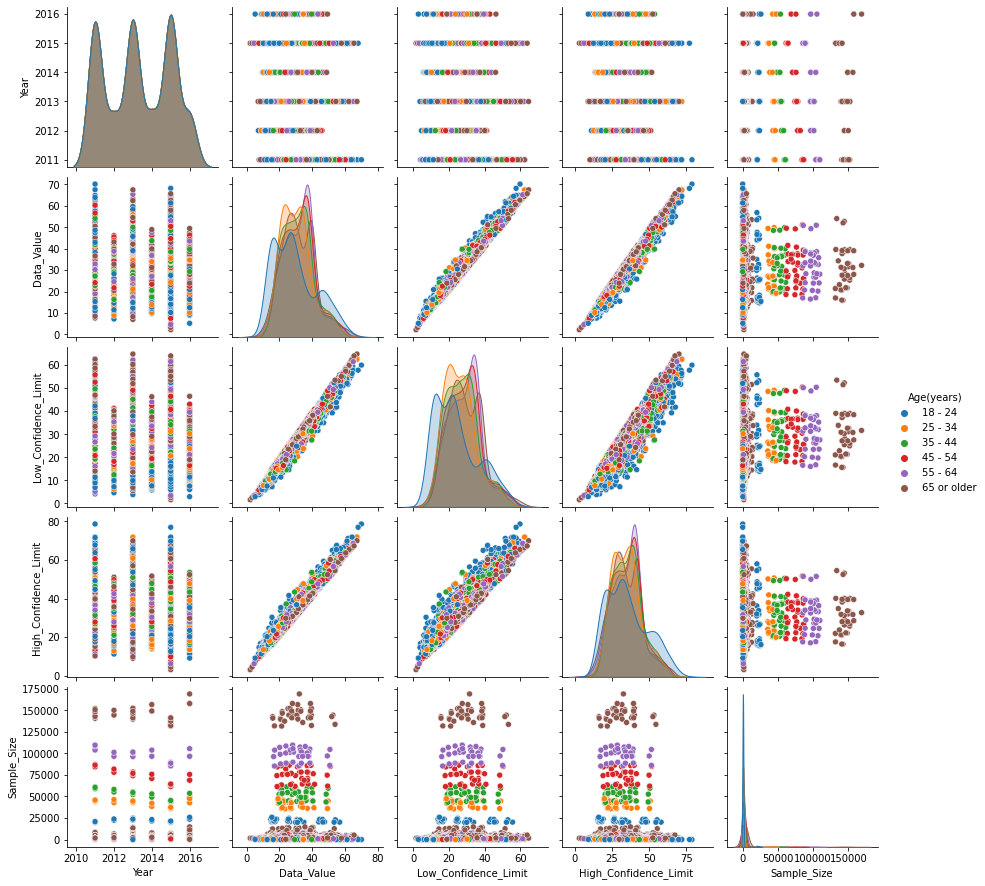

In [52]:
sns.pairplot(age_df, hue='Age(years)');

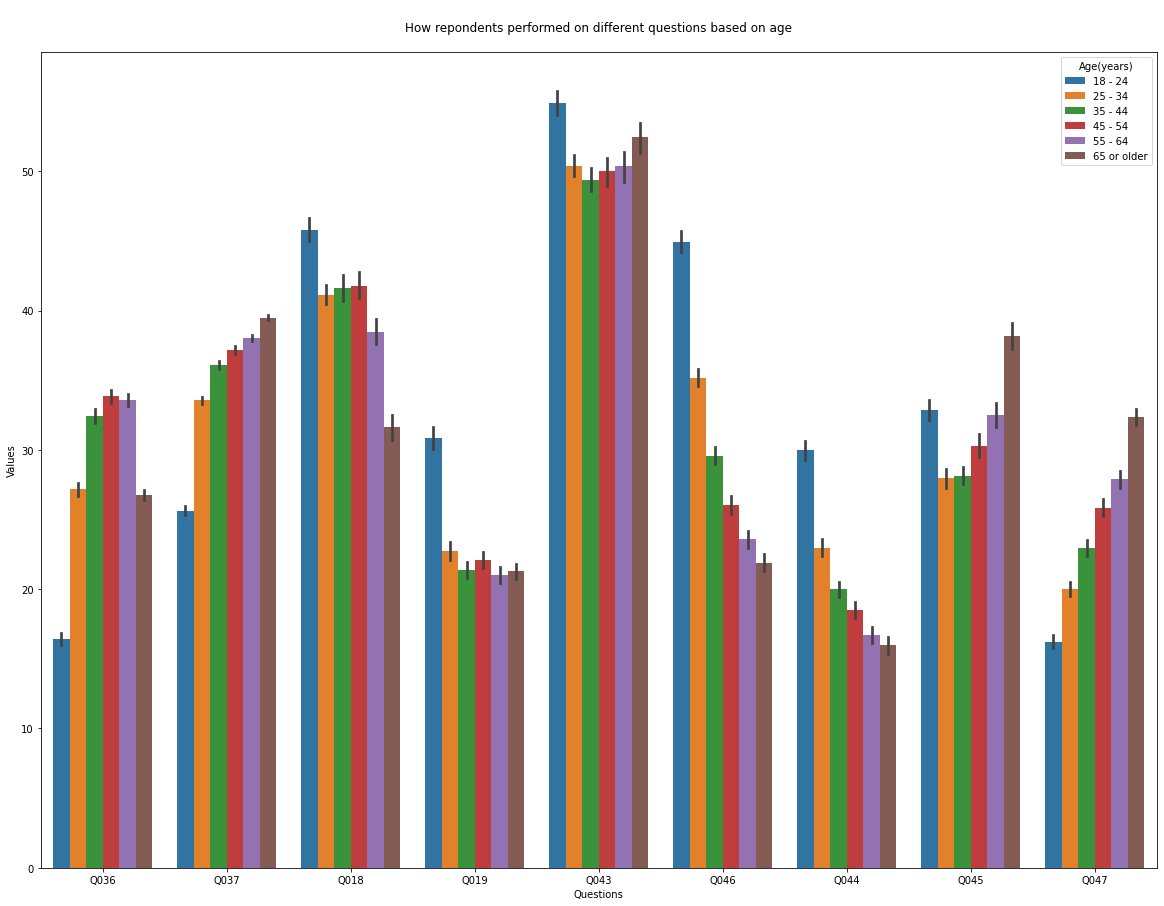

In [53]:
plt.figure(figsize=(20, 15));
sns.barplot(data=age_df, x='QuestionID', y='Data_Value', hue='Age(years)');
plt.title('\nHow repondents performed on different questions based on age\n');
plt.xlabel('Questions');
plt.ylabel('Values');

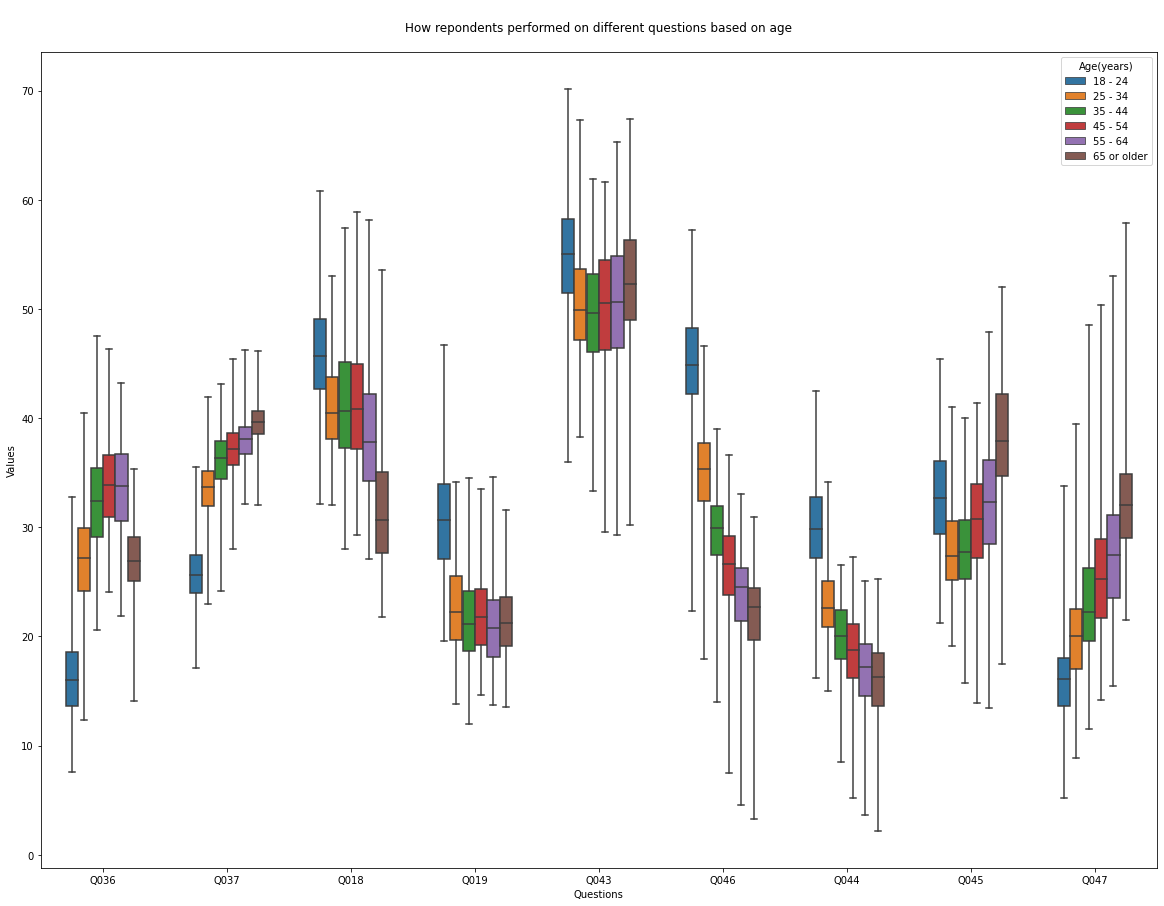

In [54]:
plt.figure(figsize=(20, 15));
sns.boxplot(x="QuestionID", y="Data_Value", data=age_df, hue='Age(years)', whis=[0, 100], width=.6)
plt.title('\nHow repondents performed on different questions based on age\n');
plt.xlabel('Questions');
plt.ylabel('Values');

In [55]:
income_df = atomic_df[atomic_df['StratificationCategory1'] == 'Income']
income_df.reset_index(drop=True, inplace=True)
income_df.head()

Year LocationAbbr  Data_Value Data_Value_Footnote  Low_Confidence_Limit  \
0  2011           AL        38.5                 NaN                  34.4   
1  2011           AL        34.8                 NaN                  31.3   
2  2011           AL        35.8                 NaN                  31.1   
3  2011           AL        32.3                 NaN                  28.0   
4  2011           AL        34.1                 NaN                  29.7   

   High_Confidence_Limit   Sample_Size Age(years) Education Gender  \
0                    42.8       1112.0        NaN       NaN    NaN   
1                    38.5       1367.0        NaN       NaN    NaN   
2                    40.8        757.0        NaN       NaN    NaN   
3                    36.8        861.0        NaN       NaN    NaN   
4                    38.8        785.0        NaN       NaN    NaN   

              Income Race/Ethnicity ClassID QuestionID  \
0  Less than $15,000            NaN     OWS       Q036   
1  $15,000 - $24,999            NaN     OWS       Q036   
2  $25,000 - $34,999            NaN     OWS       Q036   
3  $35,000 - $49,999            NaN     OWS       Q036   
4  $50,000 - $74,999            NaN     OWS       Q036   

  StratificationCategory1    Stratification1  
0                  Income  Less than $15,000  
1                  Income  $15,000 - $24,999  
2                  Income  $25,000 - $34,999  
3                  Income  $35,000 - $49,999  
4                  Income  $50,000 - $74,999

In [56]:
income_df = income_df.drop(['Education', 'Age(years)', 'Race/Ethnicity', 'Data_Value_Footnote', 'Gender', 'StratificationCategory1', 'Stratification1'], axis=1)
income_df.head()

Year LocationAbbr  Data_Value  Low_Confidence_Limit  \
0  2011           AL        38.5                  34.4   
1  2011           AL        34.8                  31.3   
2  2011           AL        35.8                  31.1   
3  2011           AL        32.3                  28.0   
4  2011           AL        34.1                  29.7   

   High_Confidence_Limit   Sample_Size             Income ClassID QuestionID  
0                    42.8       1112.0  Less than $15,000     OWS       Q036  
1                    38.5       1367.0  $15,000 - $24,999     OWS       Q036  
2                    40.8        757.0  $25,000 - $34,999     OWS       Q036  
3                    36.8        861.0  $35,000 - $49,999     OWS       Q036  
4                    38.8        785.0  $50,000 - $74,999     OWS       Q036

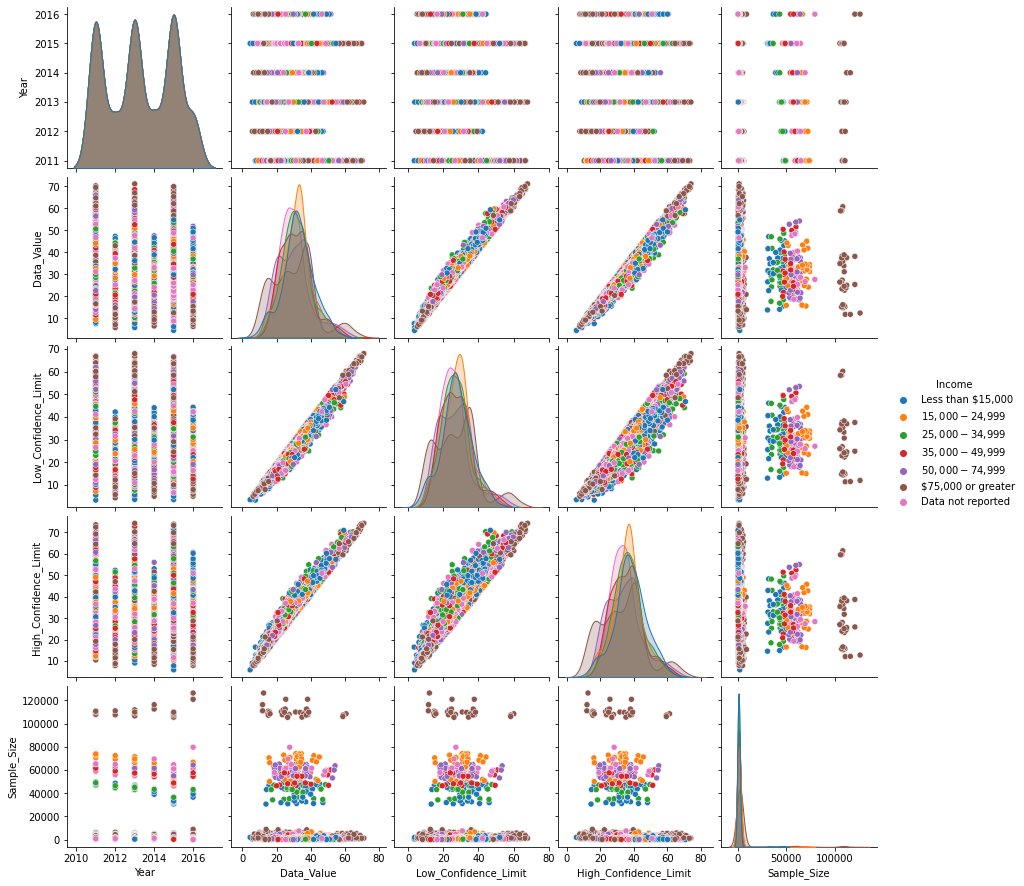

In [57]:
sns.pairplot(income_df, hue='Income');

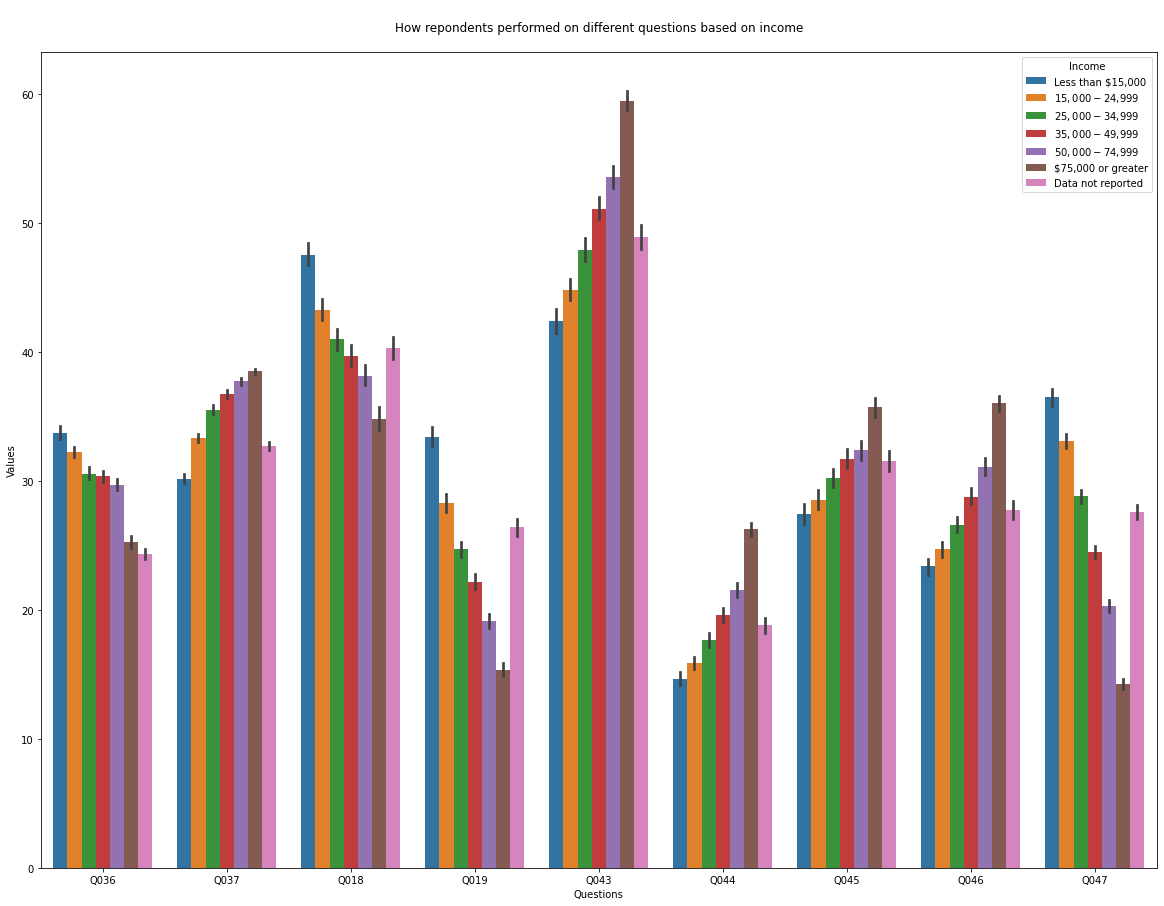

In [58]:
plt.figure(figsize=(20, 15));
sns.barplot(data=income_df, x='QuestionID', y='Data_Value', hue='Income');
plt.title('\nHow repondents performed on different questions based on income\n');
plt.xlabel('Questions');
plt.ylabel('Values');

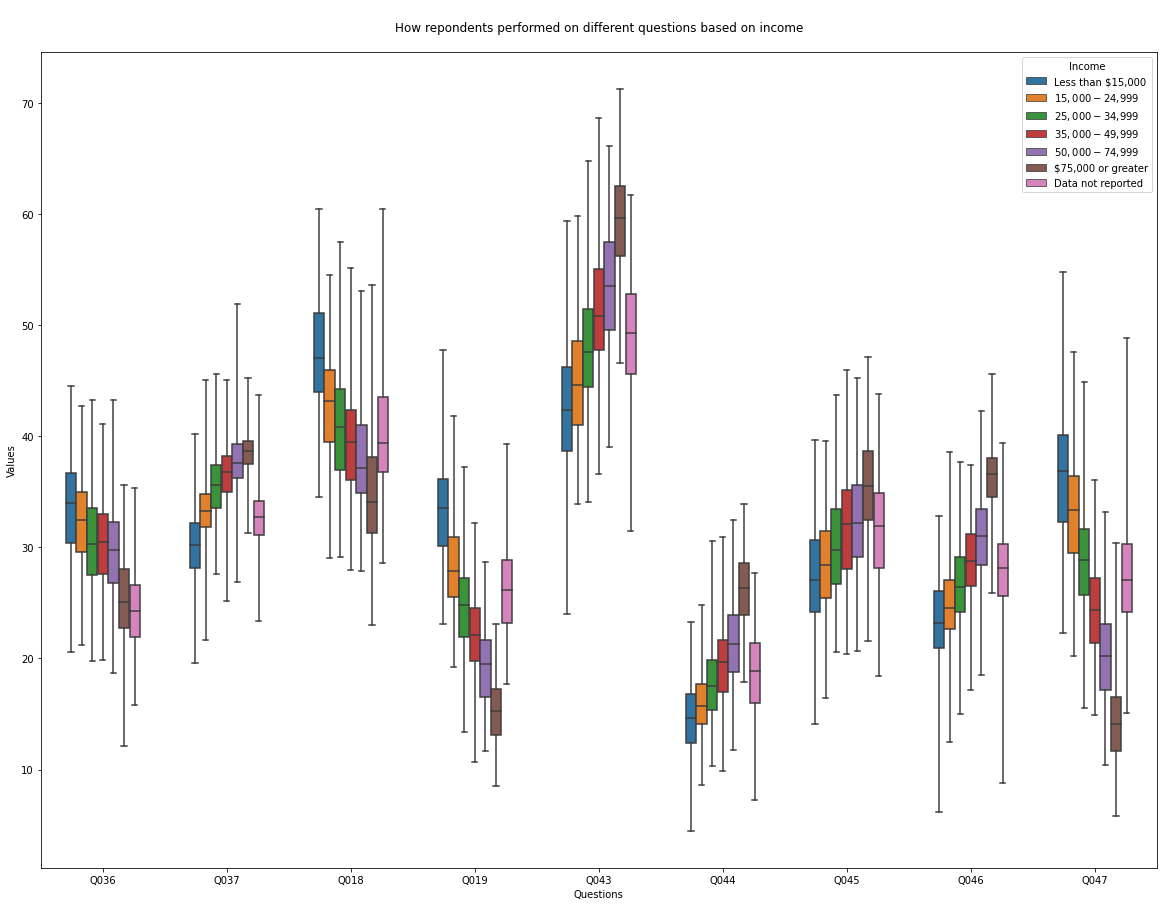

In [59]:
plt.figure(figsize=(20, 15));
sns.boxplot(x="QuestionID", y="Data_Value", data=income_df, hue='Income', whis=[0, 100], width=.6)
plt.title('\nHow repondents performed on different questions based on income\n');
plt.xlabel('Questions');
plt.ylabel('Values');

In [60]:
race_df = atomic_df[atomic_df['StratificationCategory1'] == 'Race/Ethnicity']
race_df.reset_index(drop=True, inplace=True)
race_df.head()

Year LocationAbbr  Data_Value  \
0  2011           AL        29.8   
1  2011           AL        40.1   
2  2011           AL        28.6   
3  2011           AL         NaN   
4  2011           AL         NaN   

                                       Data_Value_Footnote  \
0                                                      NaN   
1                                                      NaN   
2                                                      NaN   
3  Data not available because sample size is insufficient.   
4  Data not available because sample size is insufficient.   

   Low_Confidence_Limit  High_Confidence_Limit   Sample_Size Age(years)  \
0                  28.0                    31.6       5042.0        NaN   
1                  36.9                    43.3       1878.0        NaN   
2                  17.5                    43.1        115.0        NaN   
3                   NaN                     NaN          NaN        NaN   
4                   NaN                     NaN          NaN        NaN   

  Education Gender Income             Race/Ethnicity ClassID QuestionID  \
0       NaN    NaN    NaN         Non-Hispanic White     OWS       Q036   
1       NaN    NaN    NaN         Non-Hispanic Black     OWS       Q036   
2       NaN    NaN    NaN                   Hispanic     OWS       Q036   
3       NaN    NaN    NaN                      Asian     OWS       Q036   
4       NaN    NaN    NaN  Hawaiian/Pacific Islander     OWS       Q036   

  StratificationCategory1            Stratification1  
0          Race/Ethnicity         Non-Hispanic White  
1          Race/Ethnicity         Non-Hispanic Black  
2          Race/Ethnicity                   Hispanic  
3          Race/Ethnicity                      Asian  
4          Race/Ethnicity  Hawaiian/Pacific Islander

In [61]:
race_df = race_df.drop(['Education', 'Age(years)', 'Income', 'Data_Value_Footnote', 'Gender', 'StratificationCategory1', 'Stratification1'], axis=1)
race_df.head()

Year LocationAbbr  Data_Value  Low_Confidence_Limit  \
0  2011           AL        29.8                  28.0   
1  2011           AL        40.1                  36.9   
2  2011           AL        28.6                  17.5   
3  2011           AL         NaN                   NaN   
4  2011           AL         NaN                   NaN   

   High_Confidence_Limit   Sample_Size             Race/Ethnicity ClassID  \
0                    31.6       5042.0         Non-Hispanic White     OWS   
1                    43.3       1878.0         Non-Hispanic Black     OWS   
2                    43.1        115.0                   Hispanic     OWS   
3                     NaN          NaN                      Asian     OWS   
4                     NaN          NaN  Hawaiian/Pacific Islander     OWS   

  QuestionID  
0       Q036  
1       Q036  
2       Q036  
3       Q036  
4       Q036

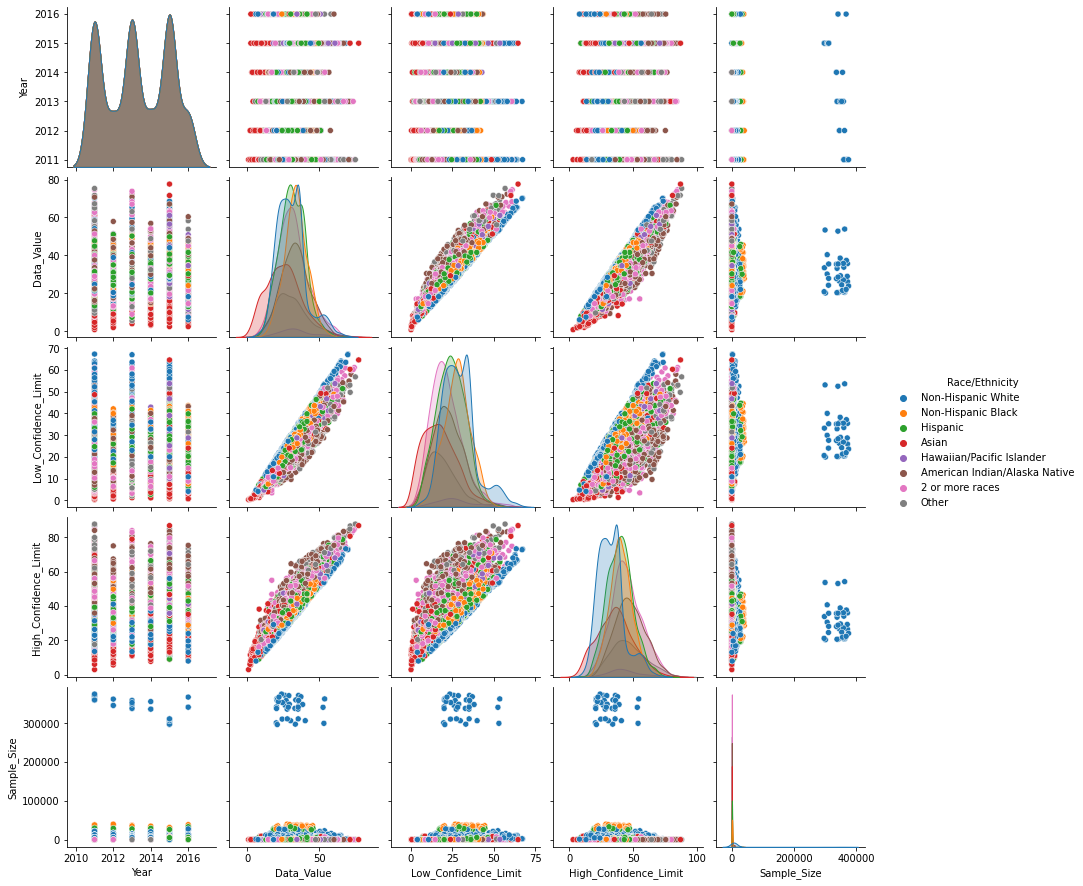

In [62]:
sns.pairplot(race_df, hue='Race/Ethnicity');

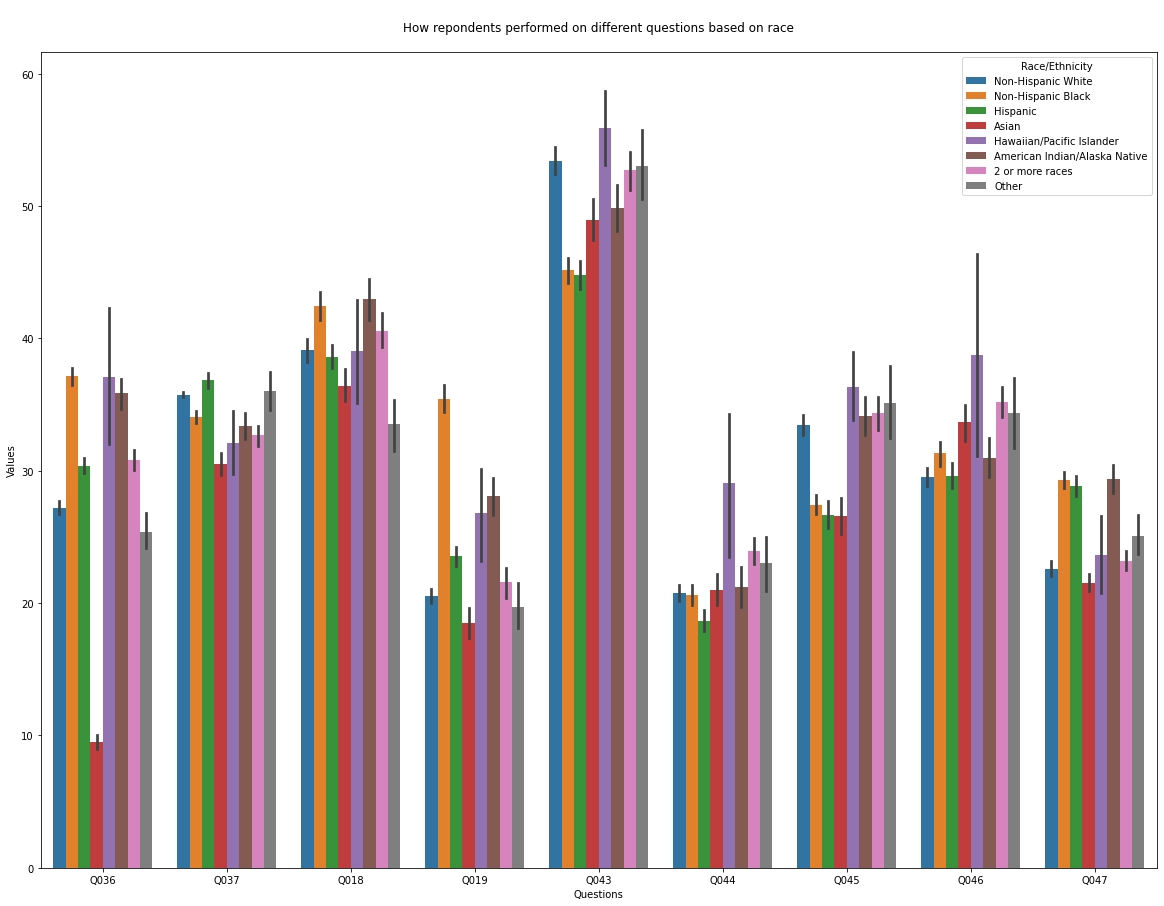

In [63]:
plt.figure(figsize=(20, 15));
sns.barplot(data=race_df, x='QuestionID', y='Data_Value', hue='Race/Ethnicity');
plt.title('\nHow repondents performed on different questions based on race\n');
plt.xlabel('Questions');
plt.ylabel('Values');

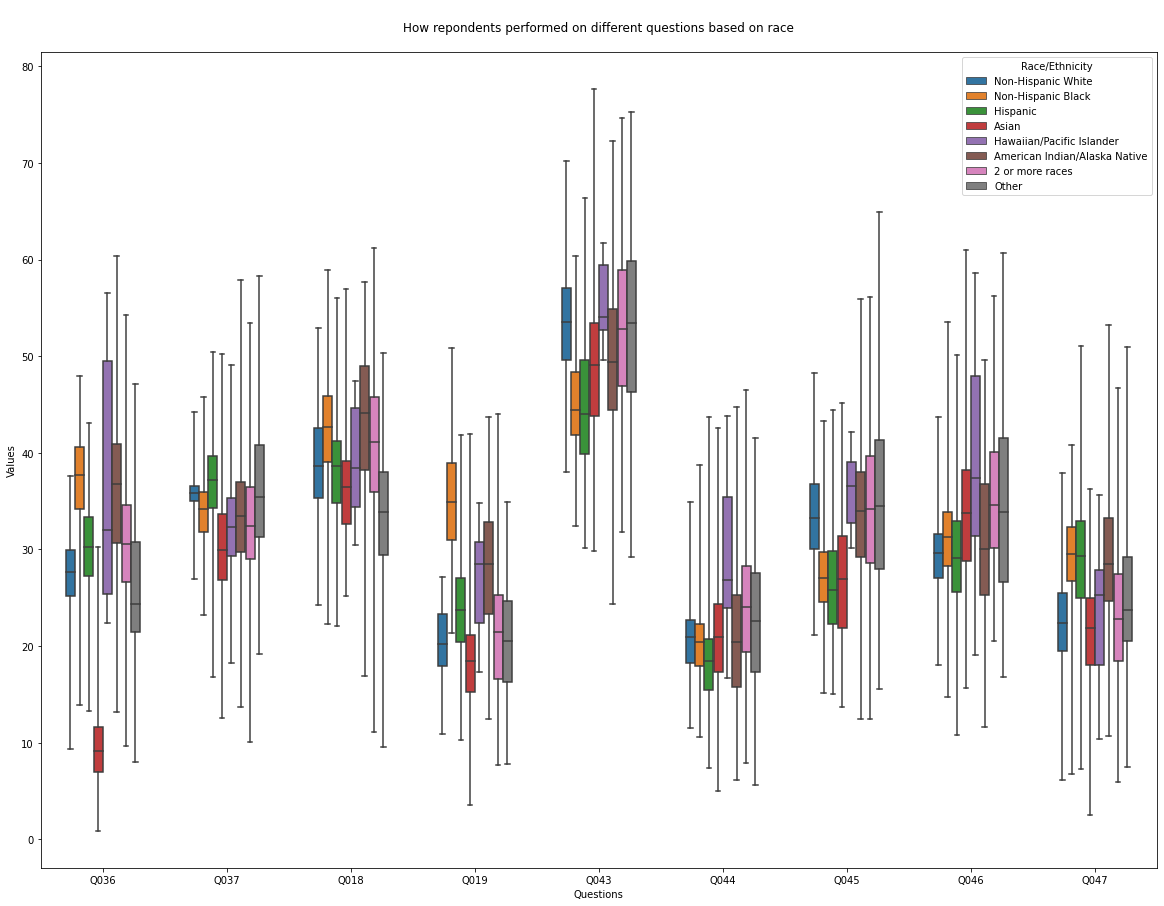

In [64]:
plt.figure(figsize=(20, 15));
sns.boxplot(x="QuestionID", y="Data_Value", data=race_df, hue='Race/Ethnicity', whis=[0, 100], width=.6)
plt.title('\nHow repondents performed on different questions based on race\n');
plt.xlabel('Questions');
plt.ylabel('Values');

In [65]:
gender_df = atomic_df[atomic_df['StratificationCategory1'] == 'Gender']
gender_df.reset_index(drop=True, inplace=True)
gender_df.head()

Year LocationAbbr  Data_Value Data_Value_Footnote  Low_Confidence_Limit  \
0  2011           AL        32.3                 NaN                  29.9   
1  2011           AL        31.8                 NaN                  30.0   
2  2011           AL        39.0                 NaN                  36.5   
3  2011           AL        30.5                 NaN                  28.7   
4  2011           AL        40.1                 NaN                  38.2   

   High_Confidence_Limit   Sample_Size Age(years) Education  Gender Income  \
0                    34.7       2581.0        NaN       NaN    Male    NaN   
1                    33.6       4723.0        NaN       NaN  Female    NaN   
2                    41.6       2581.0        NaN       NaN    Male    NaN   
3                    32.4       4723.0        NaN       NaN  Female    NaN   
4                    42.1       4792.0        NaN       NaN  Female    NaN   

  Race/Ethnicity ClassID QuestionID StratificationCategory1 Stratification1  
0            NaN     OWS       Q036                  Gender            Male  
1            NaN     OWS       Q036                  Gender          Female  
2            NaN     OWS       Q037                  Gender            Male  
3            NaN     OWS       Q037                  Gender          Female  
4            NaN      FV       Q018                  Gender          Female

In [66]:
gender_df.dtypes

Year                         int64
LocationAbbr                object
Data_Value                 float64
Data_Value_Footnote         object
Low_Confidence_Limit       float64
High_Confidence_Limit      float64
Sample_Size                float64
Age(years)                  object
Education                   object
Gender                      object
Income                      object
Race/Ethnicity              object
ClassID                     object
QuestionID                  object
StratificationCategory1     object
Stratification1             object
dtype: object

In [67]:
gender_df.shape

(3814, 16)

In [68]:
gender_encoding = {'Gender': {'Male': 1, 'Female': 0}}

In [69]:
gender_df = gender_df.replace(gender_encoding)
gender_df.head()

Year LocationAbbr  Data_Value Data_Value_Footnote  Low_Confidence_Limit  \
0  2011           AL        32.3                 NaN                  29.9   
1  2011           AL        31.8                 NaN                  30.0   
2  2011           AL        39.0                 NaN                  36.5   
3  2011           AL        30.5                 NaN                  28.7   
4  2011           AL        40.1                 NaN                  38.2   

   High_Confidence_Limit   Sample_Size Age(years) Education  Gender Income  \
0                    34.7       2581.0        NaN       NaN       1    NaN   
1                    33.6       4723.0        NaN       NaN       0    NaN   
2                    41.6       2581.0        NaN       NaN       1    NaN   
3                    32.4       4723.0        NaN       NaN       0    NaN   
4                    42.1       4792.0        NaN       NaN       0    NaN   

  Race/Ethnicity ClassID QuestionID StratificationCategory1 Stratification1  
0            NaN     OWS       Q036                  Gender            Male  
1            NaN     OWS       Q036                  Gender          Female  
2            NaN     OWS       Q037                  Gender            Male  
3            NaN     OWS       Q037                  Gender          Female  
4            NaN      FV       Q018                  Gender          Female

In [70]:
gender_df.isnull().sum().sort_values()

Year                          0
LocationAbbr                  0
Data_Value                    0
Low_Confidence_Limit          0
High_Confidence_Limit         0
Sample_Size                   0
Gender                        0
ClassID                       0
QuestionID                    0
StratificationCategory1       0
Stratification1               0
Data_Value_Footnote        3814
Age(years)                 3814
Education                  3814
Income                     3814
Race/Ethnicity             3814
dtype: int64

In [71]:
gender_df = gender_df.drop(['Age(years)', 'Income', 'Race/Ethnicity', 'Data_Value_Footnote', 'Education'], axis=1)
gender_df.head()

Year LocationAbbr  Data_Value  Low_Confidence_Limit  \
0  2011           AL        32.3                  29.9   
1  2011           AL        31.8                  30.0   
2  2011           AL        39.0                  36.5   
3  2011           AL        30.5                  28.7   
4  2011           AL        40.1                  38.2   

   High_Confidence_Limit   Sample_Size  Gender ClassID QuestionID  \
0                    34.7       2581.0       1     OWS       Q036   
1                    33.6       4723.0       0     OWS       Q036   
2                    41.6       2581.0       1     OWS       Q037   
3                    32.4       4723.0       0     OWS       Q037   
4                    42.1       4792.0       0      FV       Q018   

  StratificationCategory1 Stratification1  
0                  Gender            Male  
1                  Gender          Female  
2                  Gender            Male  
3                  Gender          Female  
4                  Gender          Female

In [72]:
for col in gender_df.columns:
    print(f'{col} has {gender_df[col].nunique()} unique values')

Year has 6 unique values
LocationAbbr has 55 unique values
Data_Value has 483 unique values
Low_Confidence_Limit has 469 unique values
High_Confidence_Limit  has 481 unique values
Sample_Size has 2476 unique values
Gender has 2 unique values
ClassID has 3 unique values
QuestionID has 9 unique values
StratificationCategory1 has 1 unique values
Stratification1 has 2 unique values


In [73]:
gender_df = gender_df.drop(['StratificationCategory1', 'Stratification1'], axis=1)
gender_df.head()

Year LocationAbbr  Data_Value  Low_Confidence_Limit  \
0  2011           AL        32.3                  29.9   
1  2011           AL        31.8                  30.0   
2  2011           AL        39.0                  36.5   
3  2011           AL        30.5                  28.7   
4  2011           AL        40.1                  38.2   

   High_Confidence_Limit   Sample_Size  Gender ClassID QuestionID  
0                    34.7       2581.0       1     OWS       Q036  
1                    33.6       4723.0       0     OWS       Q036  
2                    41.6       2581.0       1     OWS       Q037  
3                    32.4       4723.0       0     OWS       Q037  
4                    42.1       4792.0       0      FV       Q018

In [74]:
gender_df['ClassID'].unique()

array(['OWS', 'FV', 'PA'], dtype=object)

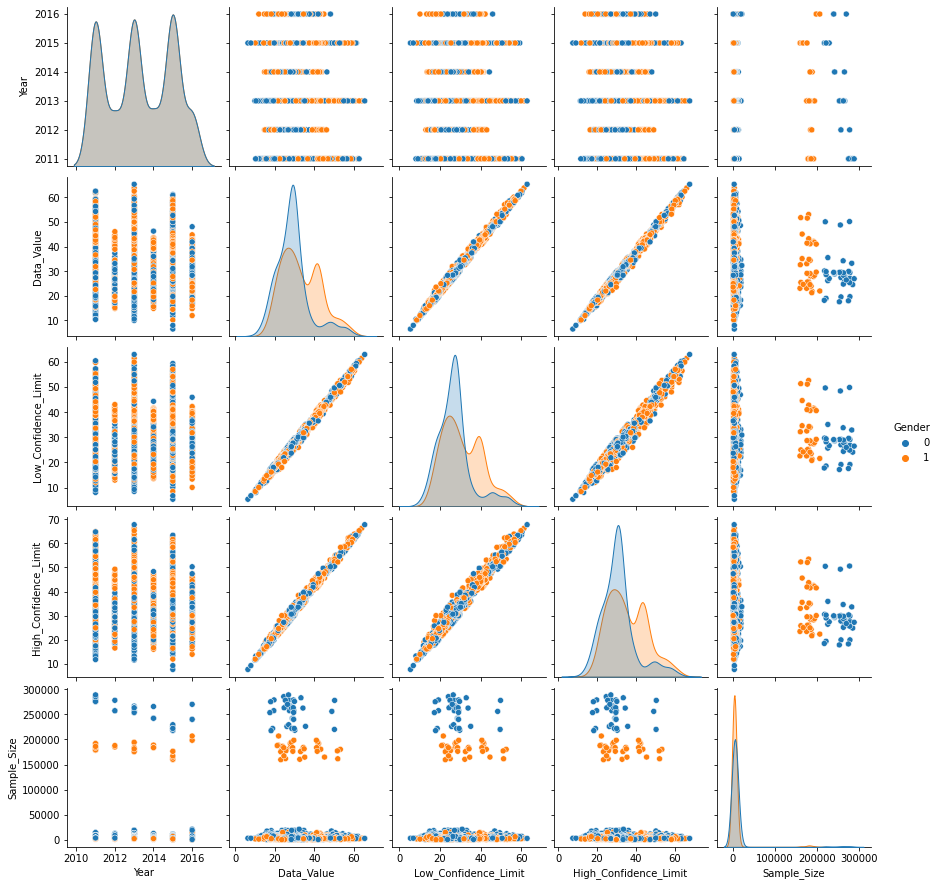

In [76]:
sns.pairplot(gender_df, hue='Gender');

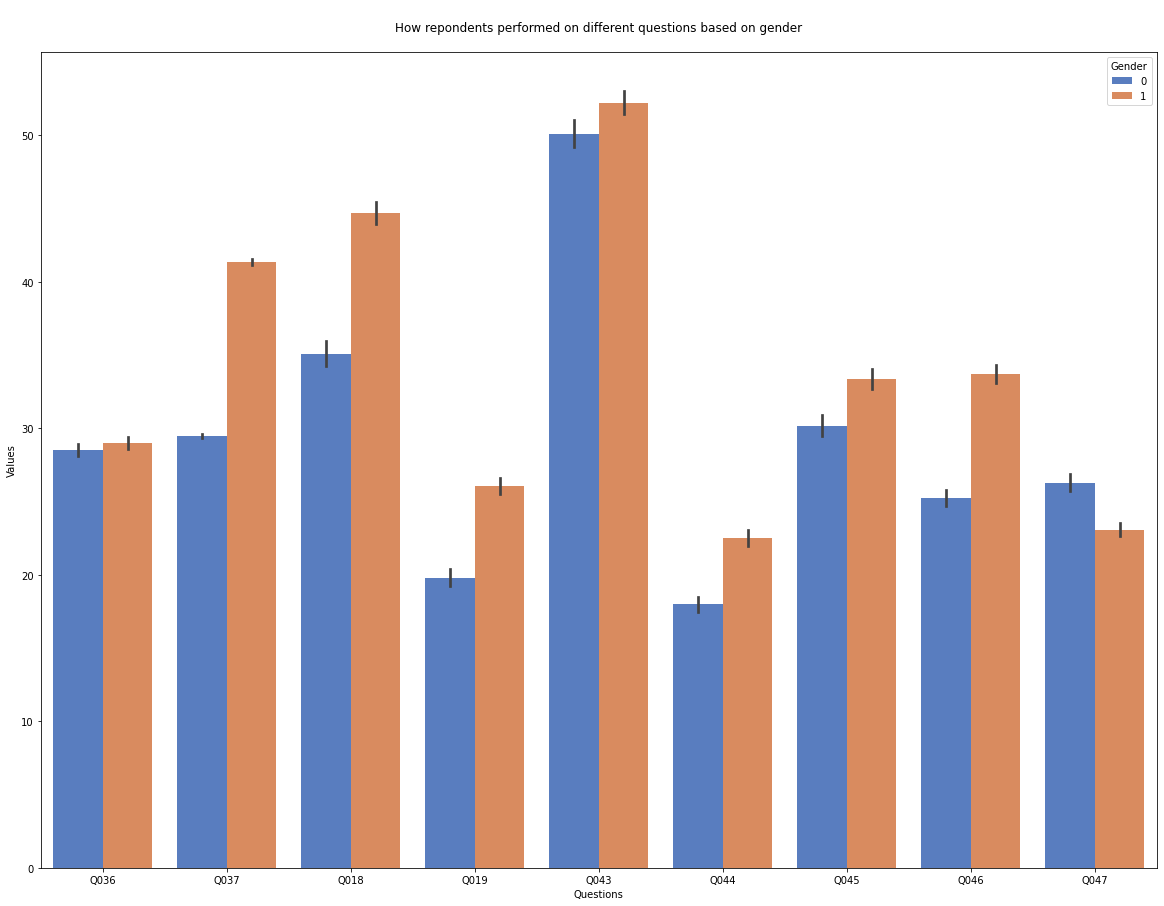

In [77]:
plt.figure(figsize=(20, 15));
sns.barplot(data=gender_df, x='QuestionID', y='Data_Value', hue='Gender', palette='muted');
plt.title('\nHow repondents performed on different questions based on gender\n');
plt.xlabel('Questions');
plt.ylabel('Values');

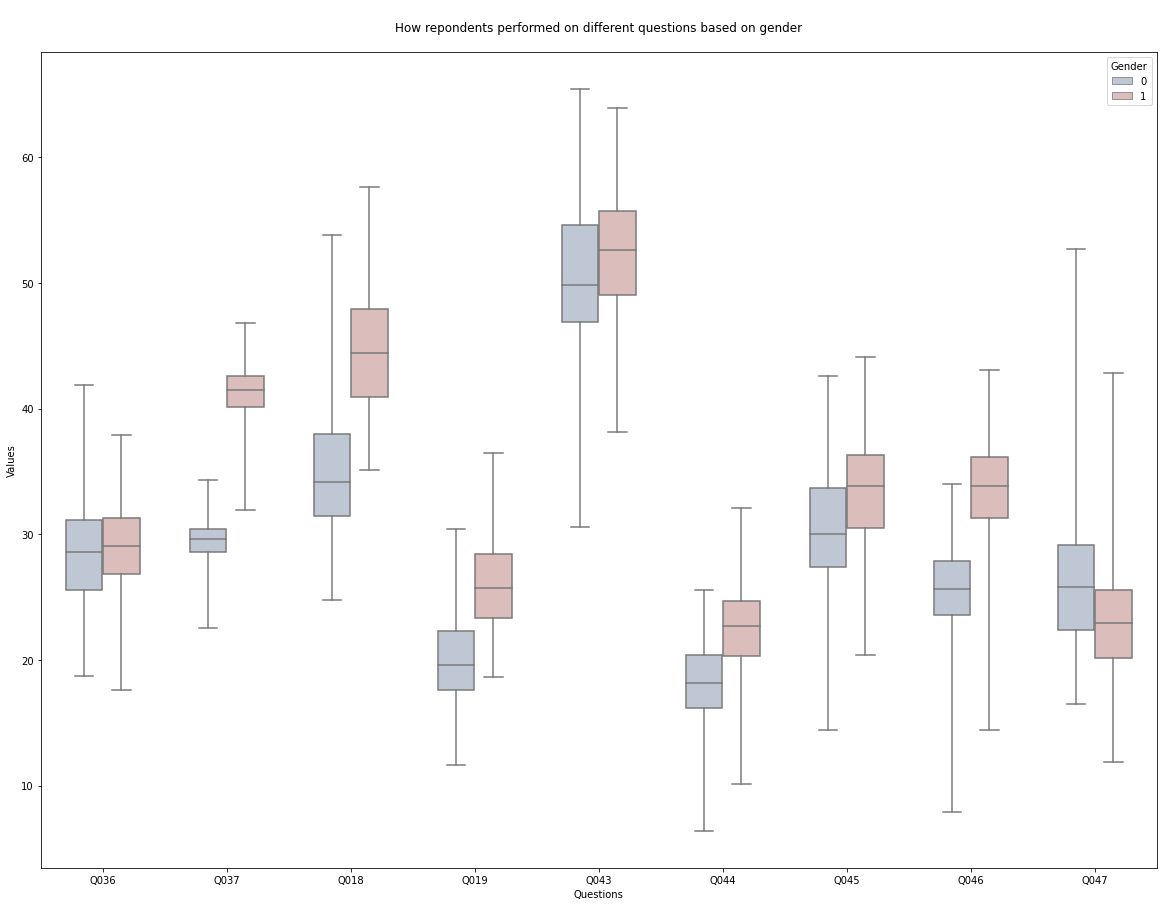

In [78]:
plt.figure(figsize=(20, 15));
sns.boxplot(x="QuestionID", y="Data_Value", data=gender_df, hue='Gender', whis=[0, 100], width=.6, palette="vlag")
plt.title('\nHow repondents performed on different questions based on gender\n');
plt.xlabel('Questions');
plt.ylabel('Values');

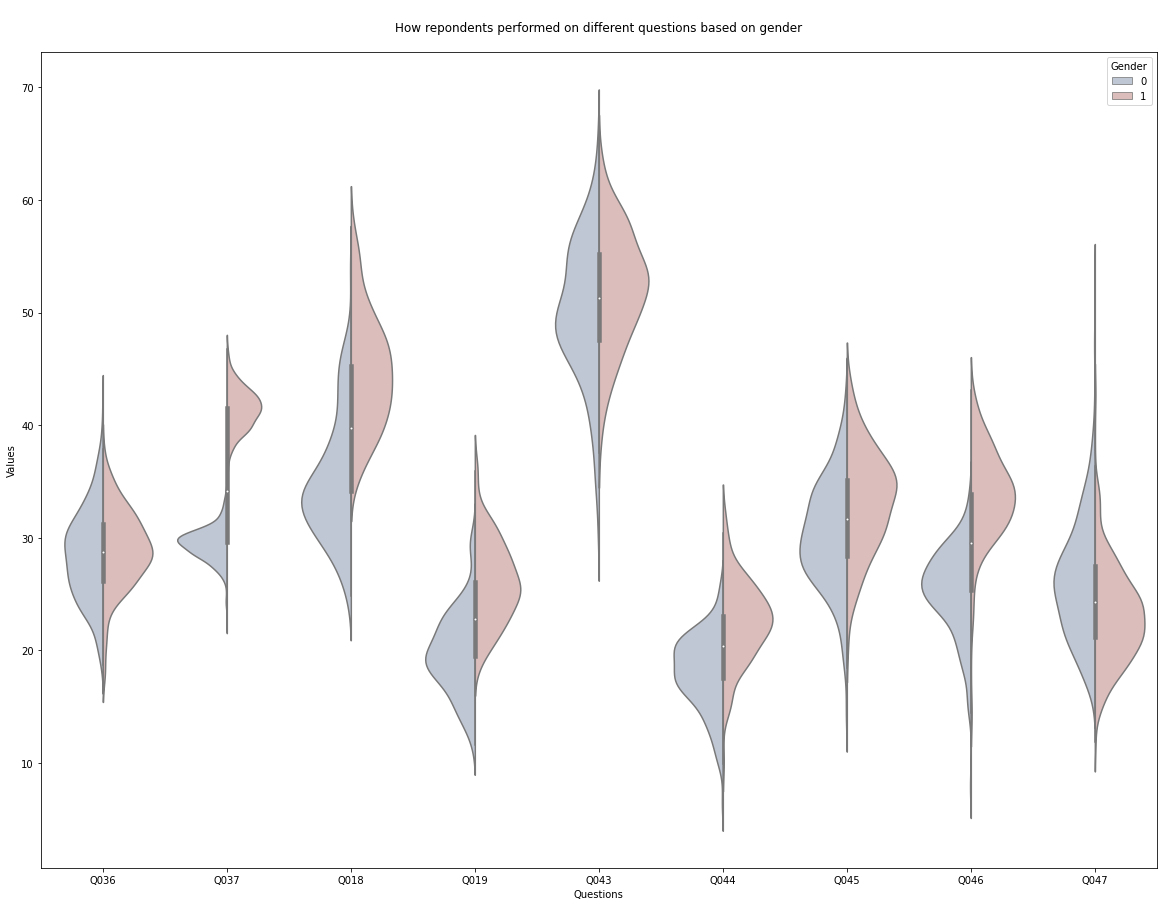

In [82]:
plt.figure(figsize=(20, 15));
sns.violinplot(x="QuestionID", y="Data_Value", hue="Gender", data=gender_df, palette="vlag", split=True);
plt.title('\nHow repondents performed on different questions based on gender\n');
plt.xlabel('Questions');
plt.ylabel('Values');